# 코드정리 배럴타구 생성 in r

### 아래의 코드는 r버전 4.0.4에서 작성되었습니다.

In [1]:
#install.packages('rvest')
#install.packages('httr')
#install.packages('corrplot')
#install.packages('coin')
#install.packages('exactRankTests')
#install.packages('plotrix')
#install.packages('gridExtra')
#install.packages('car')

In [2]:
# 분석에 필요한 패키지 불러오기 
library(rvest)
library(httr)
library(corrplot)
library(coin)
library(exactRankTests)
library(dplyr)
library(plotrix)
library(gridExtra)
library(ggplot2)
library(car)

Warning message:
"package 'httr' was built under R version 3.6.3"corrplot 0.90 loaded
Warning message:
"package 'coin' was built under R version 3.6.3"Loading required package: survival
Warning message:
"package 'exactRankTests' was built under R version 3.6.3" Package 'exactRankTests' is no longer under development.
 Please consider using package 'coin' instead.


Attaching package: 'exactRankTests'

The following objects are masked from 'package:coin':

    dperm, pperm, qperm, rperm

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [

### 배럴타구 정의를 위한 크롤링 

####  팀순위 지표 가져오기.
- 출처 : https://www.koreabaseball.com/TeamRank/TeamRank.aspx

In [3]:
### 크롤링 (파이썬으로 작동)
# from selenium.webdriver.common.keys import Keys
# import time
# import pandas as pd
# from selenium import webdriver
# from selenium import webdriver
# driver = webdriver.Chrome('C:/Users/evbf/Desktop/파이썬 연습/chromedriver_win32 (3)/chromedriver.exe' )

# xpath='https://www.koreabaseball.com/TeamRank/TeamRank.aspx'
# driver.get(xpath)

# year1 = [2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,2000,1999,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983,1982]

# aa=[]
# for page in range (1,41):
#    driver.find_element_by_xpath('//*[@id="cphContents_cphContents_cphContents_ddlYear"]/option['+str(page)+']').click()
#    time.sleep(3)
#   try:
#        k1= driver.find_element_by_xpath('//*[@id="cphContents_cphContents_cphContents_pnlMagicLeague"]/table')
#        temp_list = [x.split(' ') for x in k1.text.split('\n')]
#        aa.append(temp_list)
#        k2= driver.find_element_by_xpath('//*[@id="cphContents_cphContents_cphContents_udpRecord"]/table')
#        temp_list = [x.split(' ') for x in k2.text.split('\n')]
#        aa.append(temp_list)
#        
#    except:
#        time.sleep(3)
#        k1= driver.find_element_by_xpath('//*[@id="cphContents_cphContents_cphContents_udpRecord"]/table')
#        temp_list = [x.split(' ') for x in k1.text.split('\n')]
#        aa.append(temp_list)
       

        
#for i in range(0,22):
#    for j in range(len(aa[i])):
#        aa[i][j].append(year1[i])
        


#for i in range(21,23):
#    for j in range(len(aa[i])):
#        aa[i][j].append(2000)
        

#for i in range(23,25):
#    for j in range(len(aa[i])):
#        aa[i][j].append(1999)
        
        

#for i in range(25,42):
#    for j in range(len(aa[i])):
#        aa[i][j].append(year1[i])
        
    
# aaaaa=pd.DataFrame()
#for i in range(len(aa)):
#    aaa = pd.DataFrame(aa[i])
#    aaaaa = pd.concat([aaa, aaaaa], axis = 0)
# aaaaa.reset_index(inplace=True)
# d=aaaaa[aaaaa["index"]==0].index
# aaaaa.drop(d,inplace=True) 
# aaaaa.to_excel(excel_writer='C:/Users/evbf/Desktop/kboreport.xlsx')

# kboreport 데이터 크롤링 

####  스탯티즈 지표 가져오기.
- 출처 : http://www.statiz.co.kr/stat.php?mid=stat&re=0&ys=1982&ye=2021&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=Year&de=1&lr=5&tr=&cv=&ml=1&sn=30&pa=0&si=&cn=&o2=RBI

In [4]:
# statiz 데이터 크롤링 1 ( 기본탭 )
url="http://www.statiz.co.kr/stat.php?mid=stat&re=0&ys=1982&ye=2021&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=Year&de=1&lr=5&tr=&cv=&ml=1&sn=30&pa=0&si=&cn=&o2=RBI"
data=GET(url)
my_html<-read_html(data,encording='utf-8')
Sys.setlocale("LC_ALL", "English")
ttable<-html_table(html_nodes(my_html,'#mytable'))
Sys.setlocale("LC_ALL", "Korean")
table<-as.data.frame(ttable[[1]])

# 필요한 부분만 가져오기 
kbo_hist<-table[52:438,2:28]
colnames(kbo_hist)<-table[51,2:28]

# 필요 없는 행 지우기
kbo_hist<-kbo_hist[kbo_hist[,1]!="이름",]

[1] "LC_COLLATE=English_United States.1252;LC_CTYPE=English_United States.1252;LC_MONETARY=English_United States.1252;LC_NUMERIC=C;LC_TIME=English_United States.1252"

[1] "LC_COLLATE=Korean_Korea.949;LC_CTYPE=Korean_Korea.949;LC_MONETARY=Korean_Korea.949;LC_NUMERIC=C;LC_TIME=Korean_Korea.949"

In [5]:
# statiz 데이터 크롤링 2 ( 확장탭 )
url2="http://www.statiz.co.kr/stat.php?mid=stat&re=0&ys=1982&ye=2021&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=2&o1=Year&de=1&lr=5&tr=&cv=&ml=1&sn=30&pa=0&si=&cn=&o2=RBI"
data2=GET(url2)

my_html2<-read_html(data2,encording='utf-8')
Sys.setlocale("LC_ALL", "English")
ttable2<-html_table(html_nodes(my_html2,'#mytable'))
Sys.setlocale("LC_ALL", "Korean")
table2<-as.data.frame(ttable2[[1]])

# 필요 없는 행 지우기
kbo_hist2<-table2[52:438,c(2:3,14:22)]
colnames(kbo_hist2)<-table2[51,c(2:3,14:22)]

kbo_hist2<-kbo_hist2[kbo_hist2[,1]!="이름",]

[1] "LC_COLLATE=English_United States.1252;LC_CTYPE=English_United States.1252;LC_MONETARY=English_United States.1252;LC_NUMERIC=C;LC_TIME=English_United States.1252"

[1] "LC_COLLATE=Korean_Korea.949;LC_CTYPE=Korean_Korea.949;LC_MONETARY=Korean_Korea.949;LC_NUMERIC=C;LC_TIME=Korean_Korea.949"

In [6]:
# 변수명 설정
# 크롤링 데이터 2의 경우 중복되는 변수명이 존재한다.
# 파크팩터를 고려한 변수의 경우 변수명 뒤에 _p를 붙여 그렇지 않은 변수과 구별한다.
colnames(kbo_hist2)[7:11]<-c("wOBA_p","wRC_p","wRC/27_p","wRAA_p","wRC+_p")

In [7]:
# 크롤링 데이터 1 과 2에서 이름의 순서가 잘못된 경우 확인
# 데이터 정렬을 연도, 타점으로 했으나 맞지 않은 경우가 있을 수 있으므로 확인

tmp<-matrix(0,ncol=2,nrow=nrow(kbo_hist))
for ( i in 1:nrow(kbo_hist) ){
  tmp[i]<-sum(kbo_hist[i,1:2]!=kbo_hist2[i,1:2])}
tmp

# 2개의 관측치의 팀 이름이 두 팀으로 나뉜 경우가 존재
# 해당 경우에 한 팀명으로 변환한다.
unique(kbo_hist$이름)
kbo_hist[kbo_hist$이름 == "해태/KIA",]$이름<-"KIA"
kbo_hist[kbo_hist$이름 == "삼미/청보",]$이름<-"청보"

#해당 위치에서 팀 이름 순서가 맞지 않음
# 95,96
# 116,117

kbo_hist2[95:96,1:2]
kbo_hist[95:96,1:2]

kbo_hist2[116:117,1:2]
kbo_hist[116:117,1:2]

0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0


[1] "KT"        "삼성"      "SSG"       "NC"        "키움"      "두산"     
 [7] "롯데"      "LG"        "한화"      "KIA"       "SK"        "넥센"     
[13] "kt"        "히어로즈"  "현대"      "해태/KIA"  "해태"      "쌍방울"   
[19] "OB"        "태평양"    "빙그레"    "MBC"       "청보"      "삼미/청보"
[25] "삼미"

,이름,팀
164,한화,12
165,롯데,12


,이름,팀
164,롯데,12
165,한화,12


,이름,팀
189,히어로즈,09
190,삼성,09


,이름,팀
189,삼성,09
190,히어로즈,09


In [8]:
# 크롤링 데이터의 연도의 경우 각 년도 뒷 2자리만 나오기 때문에 1900년대와 2000년대를 구분지어
# 각각 1900과 2000을 더한다.
kbo_team_data<-as.data.frame(cbind(kbo_hist,kbo_hist2[,3:11]))
kbo_team_data[,2]
for ( i in 1:nrow(kbo_team_data) ){
  ifelse(as.numeric(kbo_team_data[i,2]) >22, kbo_team_data[i,2]<-as.numeric(kbo_team_data[i,2])+1900,
         kbo_team_data[i,2]<-as.numeric(kbo_team_data[i,2])+2000)
}


for ( i in 2:36 ){
  class(kbo_team_data[,i])<-"numeric"
}

# 15~17년도에서 kt가 소문자로 입력이 되어있다. 이를 대문자로 변경
kbo_team_data[kbo_team_data$이름=="kt","이름"]<-c("KT","KT","KT")

[1] "21" "21" "21" "21" "21" "21" "21" "21" "21" "21" "20" "20" "20" "20" "20"
 [16] "20" "20" "20" "20" "20" "19" "19" "19" "19" "19" "19" "19" "19" "19" "19"
 [31] "18" "18" "18" "18" "18" "18" "18" "18" "18" "18" "17" "17" "17" "17" "17"
 [46] "17" "17" "17" "17" "17" "16" "16" "16" "16" "16" "16" "16" "16" "16" "16"
 [61] "15" "15" "15" "15" "15" "15" "15" "15" "15" "15" "14" "14" "14" "14" "14"
 [76] "14" "14" "14" "14" "13" "13" "13" "13" "13" "13" "13" "13" "13" "12" "12"
 [91] "12" "12" "12" "12" "12" "12" "11" "11" "11" "11" "11" "11" "11" "11" "10"
[106] "10" "10" "10" "10" "10" "10" "10" "09" "09" "09" "09" "09" "09" "09" "09"
[121] "08" "08" "08" "08" "08" "08" "08" "08" "07" "07" "07" "07" "07" "07" "07"
[136] "07" "06" "06" "06" "06" "06" "06" "06" "06" "05" "05" "05" "05" "05" "05"
[151] "05" "05" "04" "04" "04" "04" "04" "04" "04" "04" "03" "03" "03" "03" "03"
[166] "03" "03" "03" "02" "02" "02" "02" "02" "02" "02" "02" "01" "01" "01" "01"
[181] "01" "01" "01" "01" "00" "00" "00" "00" "00" "00" "00" "00" "99" "99" "99"
[196] "99" "99" "99" "99" "99" "98" "98" "98" "98" "98" "98" "98" "98" "97" "97"
[211] "97" "97" "97" "97" "97" "97" "96" "96" "96" "96" "96" "96" "96" "96" "95"
[226] "95" "95" "95" "95" "95" "95" "95" "94" "94" "94" "94" "94" "94" "94" "94"
[241] "93" "93" "93" "93" "93" "93" "93" "93" "92" "92" "92" "92" "92" "92" "92"
[256] "92" "91" "91" "91" "91" "91" "91" "91" "91" "90" "90" "90" "90" "90" "90"
[271] "90" "89" "89" "89" "89" "89" "89" "89" "88" "88" "88" "88" "88" "88" "88"
[286] "87" "87" "87" "87" "87" "87" "87" "86" "86" "86" "86" "86" "86" "86" "85"
[301] "85" "85" "85" "85" "85" "84" "84" "84" "84" "84" "84" "83" "83" "83" "83"
[316] "83" "83" "82" "82" "82" "82" "82" "82"

In [9]:
# kbreport에서 가져온 데이터 불러오기 ( 크롤링 파이썬으로 진행 )

kreport<-read.table("kboreport.csv",sep=',',header=F)
kreport<-kreport[,c(3:8,14)]
colnames(kreport)<-c("팀","게임","승","패","무","승률","연도")

# kbreport와 statiz데이터 합치기
# 연도와 팀명이 같은 행을 찾아 하나의 데이터로 만든다
# 2008년도에서 kreport의 팀명 중 "우리"를 "히어로즈"로 변환

kreport[kreport$팀 == "우리" ,"팀"] <-"히어로즈"

# 임시 데이터셋 만들기 ( -2를 한 이유는 연도와 팀명이 중복으로 나오기 때문이다. )
kbo_dataset<-data.frame(matrix(0,nrow=nrow(kbo_team_data),ncol=ncol(kbo_team_data) + ncol(kreport) - 2))

# 동일한 해와 팀명을 갖는 데이터를 하나의 데이터로 만든다
for ( i in 1:nrow(kbo_team_data) ){
  for ( j in 1:nrow(kreport) ){
    ifelse((kbo_team_data$이름[i]==kreport$팀[j] & kbo_team_data$팀[i] == kreport$연도[j]),
           kbo_dataset[i,]<-cbind(kbo_team_data[i,],kreport[j,2:6]),
           0)
  }
}


# 데이터셋 변수명 설정
colnames(kbo_dataset)<-c(colnames(kbo_team_data),colnames(kreport)[2:6])
colnames(kbo_dataset)[1:2]<-c("팀명","연도")


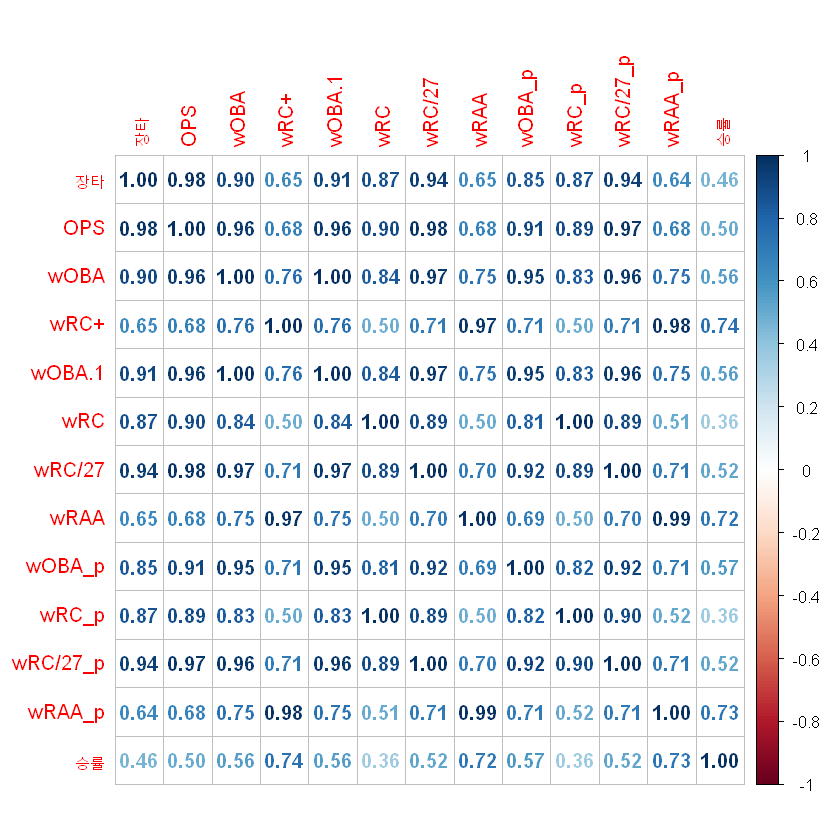

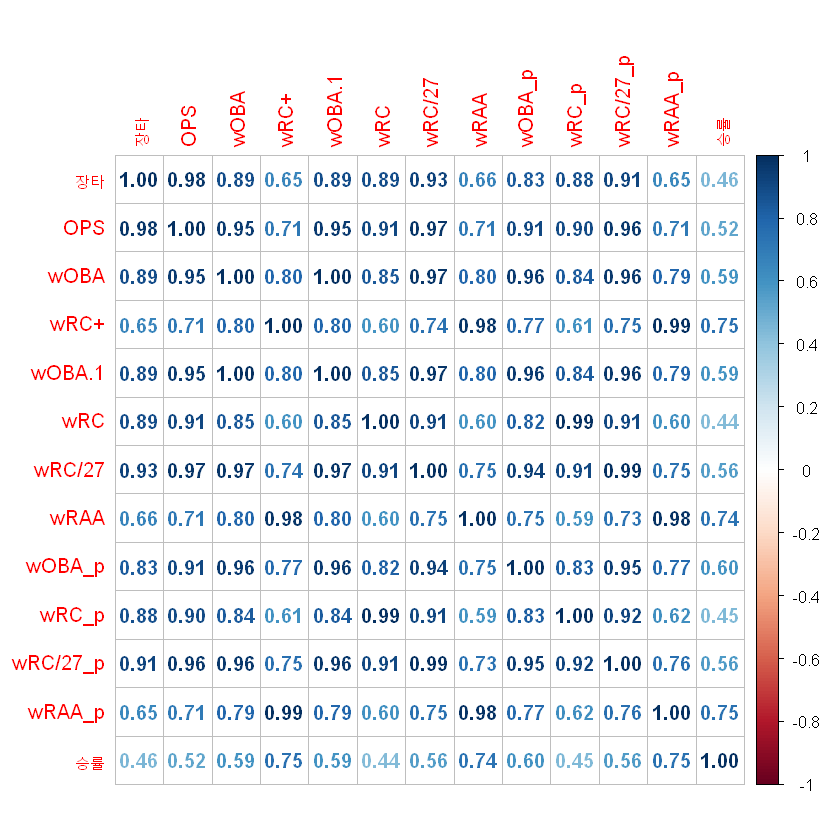

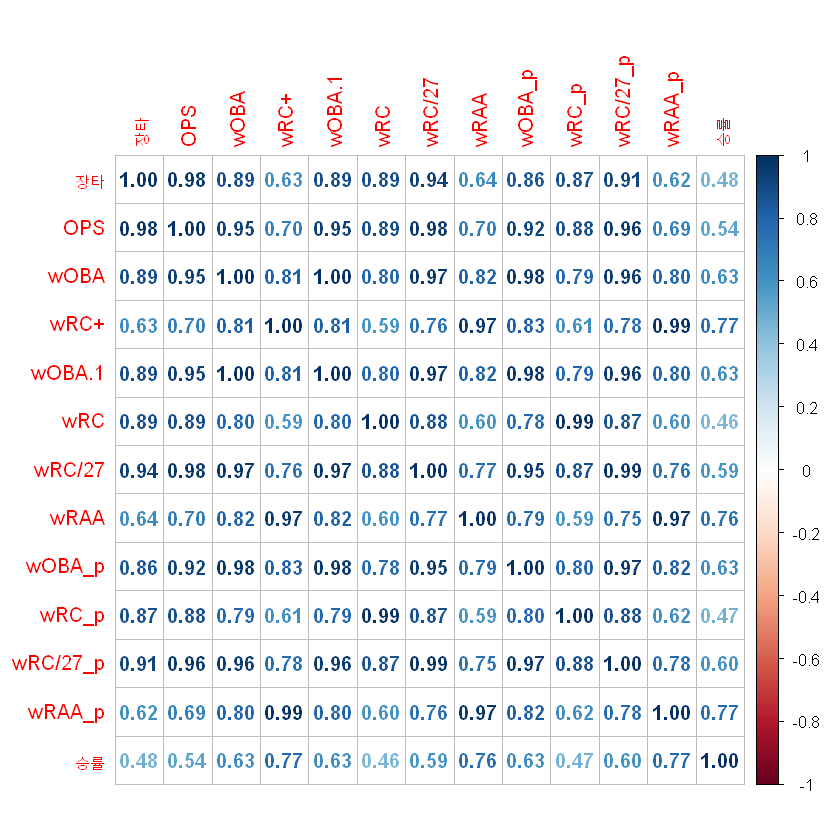

ERROR: Error in cor(kbo_dataset[, c(24:35, 41)])[, 39]: 첨자의 허용 범위를 벗어났습니다


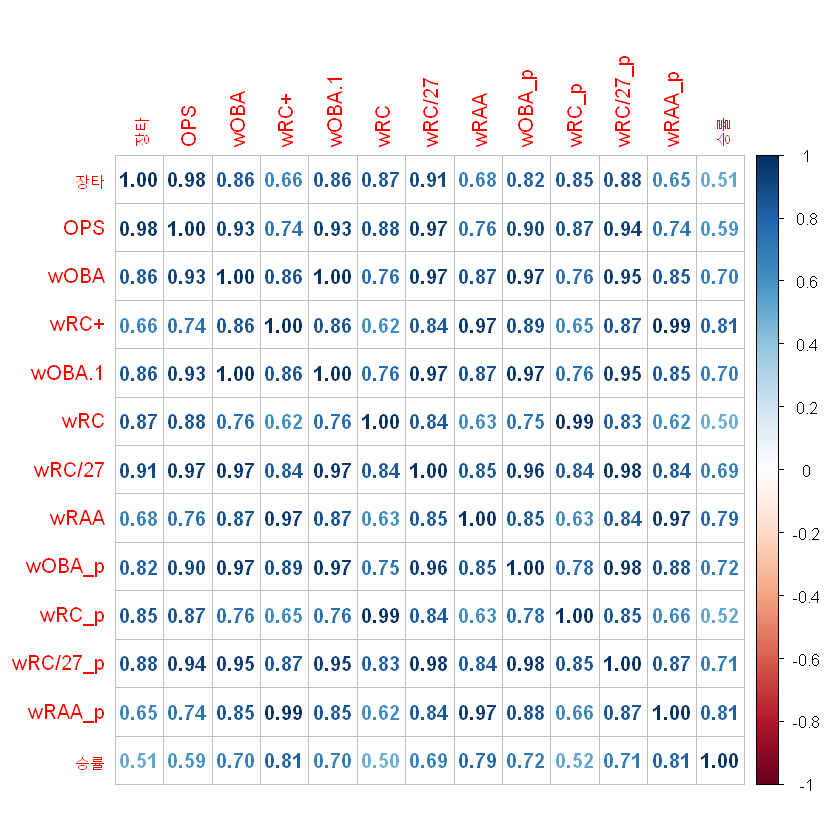

In [10]:
# 팀 승수와 가장 관련이 높은 변수를 상관계수 기준으로 살펴보기
corrplot(cor(kbo_dataset[,c(24:35,41)]), method="number")

# 00년 이후 데이터만으로 승률과 다른 변수간의 상관계수 확인하기
kbo_dataset00<-kbo_dataset[kbo_dataset$연도 >=2000,]
corrplot(cor(kbo_dataset00[,c(24:35,41)]), method="number")

# 10년 이후 데이터 사용
kbo_dataset10<-kbo_dataset[kbo_dataset$연도 >=2010,]
corrplot(cor(kbo_dataset10[,c(24:35,41)]), method="number")

# 15년 이후 데이터 사용
kbo_dataset15<-kbo_dataset[kbo_dataset$연도 >=2015,]
corrplot(cor(kbo_dataset15[,c(24:35,41)]), method="number")

# 상관계수 살펴보기
cbind(cor(kbo_dataset[,c(24:35,41)])[,39],cor(kbo_dataset00[,3:41])[,39],cor(kbo_dataset10[,3:41])[,39],cor(kbo_dataset15[,3:41])[,39])

### kbo배럴타구 기준설정을 위해 wRC+ 지표 채택

#### 1. wRC+ 사용, 문제점
- 한계점 : 계산식이 다르다


- wRC+ 값별 구간 (출처 : https://namu.wiki/w/wRC+) <br>
 160 ~ : excellent <br>
 140 ~ 160 : great <br> 
 115 ~ 140 : above average <br>
 100 ~ 115 : average <br>
 80 ~ 100 : below average <br>
 75 ~ 80 : poor <br>
 ~ 75 : awful

In [11]:
# statiz 데이터 크롤링 3 ( 82~20년 까지의 타자 데이터, 타율, 출루율, 장타율, OPS, wOBA, wRC+ )

for ( i in c(1982:2020) ){
  url=paste("http://www.statiz.co.kr/stat.php?mid=stat&re=0&ys=",i,"&ye=",i,"&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR_ALL_ADJ&o2=TPA&de=1&lr=0&tr=&cv=&ml=1&pa=0&si=&cn=&sn=150",sep='')
  data=GET(url)
  my_html<-read_html(data,encording='utf-8')
  Sys.setlocale("LC_ALL", "English")
  ttable<-html_table(html_nodes(my_html,'#mytable'))
  Sys.setlocale("LC_ALL", "Korean")
  # 불필요한 행 지우기
  for ( j in (nrow(ttable[[1]])%/%12):1 ){
    ttable[[1]]<-ttable[[1]][-c(j*12,j*12+1),]
  }
  ttable[[1]]<-ttable[[1]][-1,]   
  
  tmp<-as.data.frame(ttable[[1]])
  
  for( k in 1:nrow(tmp) ) {
    ifelse(as.numeric(substr(tmp[k,3],1,2)) > 81 ,
           tmp$year[k]<-as.numeric(substr(tmp[k,3],1,2)) + 1900,
           tmp$year[k]<-as.numeric(substr(tmp[k,3],1,2)) + 2000)
  }
  
  
  tmp<-as.data.frame(tmp[-1,-c(1:4,6:23,30:31)])
  
  colnames(tmp)<-c("타석","타율","출루율","장타율","OPS","wOBA","wRC+","연도")
  
  for ( t in 1:ncol(tmp) ){
    tmp[,t]<-as.numeric(tmp[,t])
  }
  
  # wRC+ 그룹 생성
  for ( l in 1:nrow(tmp) ){
    ifelse(tmp[l,"wRC+"] >= 160 ,
           tmp$grp[l]<- 1,
           ifelse(tmp[l,"wRC+"] >= 140 ,
                  tmp$grp[l]<- 2,
                  ifelse(tmp[l,"wRC+"] >= 115 ,
                         tmp$grp[l]<- 3,
                         ifelse(tmp[l,"wRC+"] >= 100 ,
                                tmp$grp[l]<- 4,
                                ifelse(tmp[l,"wRC+"] >= 80 ,
                                       tmp$grp[l]<- 5,
                                       ifelse(tmp[l,"wRC+"] >= 75 ,
                                              tmp$grp[l]<- 6, tmp$grp[l]<- 7))))))
  }
  tmp$grp<-as.factor(tmp$grp)
  
  # 각 년도별 경기 수를 고려한 규정타석 5%이상의 데이터만 가져오기
  # koreabaseball.com에 있는 자료 참고, 규정타석은 (해당 연도의 경기 수 * 3.1)로 계산하며 소수는 버림으로 처리한다.
  ifelse(i==1982 ,
         tmp<-tmp[tmp$타석 >= floor(80*3.1*0.05),],
         ifelse(i %in% c(1983,1984) ,
                tmp<-tmp[tmp$타석 >= floor(100*3.1*0.05),],
                ifelse(i==1985,
                       tmp<-tmp[tmp$타석 >= floor(110*3.1*0.05),],
                       ifelse(i %in% c(1986:1988) ,
                              tmp<-tmp[tmp$타석 >= floor(108*3.1*0.05),],
                              ifelse(i %in% c(1989,1990) ,
                                     tmp<-tmp[tmp$타석 >= floor(120*3.1*0.05),],
                                     ifelse(i %in% c(1991:1998,2005:2008),
                                            tmp<-tmp[tmp$타석 >= floor(126*3.1*0.05),],
                                            ifelse(i==1999,
                                                   tmp<-tmp[tmp$타석 >= floor(132*3.1*0.05),],
                                                   ifelse(i %in% c(2000:2004,2009:2012),
                                                          tmp<-tmp[tmp$타석 >= floor(133*3.1*0.05),],
                                                          ifelse(i %in% c(2013,2014),
                                                                 tmp<-tmp[tmp$타석 >= floor(128*3.1*0.05),],tmp<-tmp[tmp$타석 >= floor(144*3.1*0.05),])))))))))
  
  assign(paste("kbo",i,sep='_'),tmp)
}

### 차이를 보기위해 메이저리그 지표 가져오기. 
- 출처 : https://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=y&type=8&season=2021&month=0&season1=1871&ind=0&team=0&rost=0&players=0

In [12]:
# MLB 데이터 가져오기
# 해당 데이터는 fangraph에서 가져옴

mlb_data<-read.table("mlbdata.csv",sep=',',header=T)

# MLB데이터에 wRC+ 기준으로 grp 변수 생성

for ( i in 1:nrow(mlb_data) ){
  ifelse(mlb_data[i,"wRC."] >= 160 ,
         mlb_data$grp[i]<- 1,
         ifelse(mlb_data[i,"wRC."] >= 140 ,
                mlb_data$grp[i]<- 2,
                ifelse(mlb_data[i,"wRC."] >= 115 ,
                       mlb_data$grp[i]<- 3,
                       ifelse(mlb_data[i,"wRC."] >= 100 ,
                              mlb_data$grp[i]<- 4,
                              ifelse(mlb_data[i,"wRC."] >= 80 ,
                                     mlb_data$grp[i]<- 5,
                                     ifelse(mlb_data[i,"wRC."] >= 75 ,
                                            mlb_data$grp[i]<- 6, mlb_data$grp[i]<- 7))))))
}
mlb_data$grp<-as.factor(mlb_data$grp)

# MLB 자료 규정타석 5%이상인 자료로 연도별 데이터 만들기


for ( i in 1982:2020 ){
  ifelse(i==2020,
         assign(paste("mlb",i,sep='_'),mlb_data[(mlb_data$Season==i & mlb_data$PA >= round(60*3.1*0.05)),]),
         assign(paste("mlb",i,sep='_'),mlb_data[(mlb_data$Season==i & mlb_data$PA >= round(162*3.1*0.05)),]))
}

### 메이저리그와 kbo리그의 차이에 대한 가설검정 진행 
 1) 표본이  10이하라면 윌콕슨 순위합 검정 진행 <br><br> 2) 표본이 30이상이면서 등분산이 아니라면 이분산 t검정 진행 <br><br> 3) 표본이 30이상이면서 등분산이라면 등분산 t검정 진행 <br><br> 4) 표본의 크기가 10~30일 경우 정규성의 여부에 따라 정규성을 만족한다면 t검정, <br>     정규성을 만족하지 않는다면 윌콕슨검정 진행

In [13]:
# 동일연도에 kbo와 mlb 자료에서 같은 wrc+ 그룹인 데이터간 타율과 장타율의 차이가 있는지 확인. 

tv<-function(kbo,mlb){
  tmp<-matrix(0,nrow=7,ncol=2)
  for ( i in 1:7 ){
    ifelse((nrow(kbo[kbo$grp==i,]) <= 2| nrow(mlb[mlb$grp==i,])<=2),
           tmp[i,1]<-999,
           ifelse((nrow(kbo[kbo$grp==i,]) + nrow(mlb[mlb$grp==i,])<=10),
                  tmp[i,1]<-wilcox.exact(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"])$p.value,
                  ifelse((nrow(kbo[kbo$grp==i,]) + nrow(mlb[mlb$grp==i,])<=30),
                         ifelse((shapiro.test(kbo[kbo$grp==i,"타율"])$p.value <= 0.05 | shapiro.test(mlb[mlb$grp==i,"AVG"])$p.value <= 0.05),
                                tmp[i,1]<-wilcox.exact(kbo[kbo$grp==1,"타율"],mlb[mlb$grp==i,"AVG"])$p.value,
                                ifelse(var.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"])$p.value <= 0.05,
                                       tmp[i,1]<-t.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"],var.equal=FALSE)$p.value,
                                       tmp[i,1]<-t.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"],var.equal=TRUE)$p.value)),
                         ifelse(var.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==1,"AVG"])$p.value <= 0.05,
                                tmp[i,1]<-t.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"],var.equal=FALSE)$p.value,
                                tmp[i,1]<-t.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"],var.equal=TRUE)$p.value))))
    
    ifelse((nrow(kbo[kbo$grp==i,]) <= 2| nrow(mlb[mlb$grp==i,])<=2),
           tmp[i,2]<-999,
           ifelse((nrow(kbo[kbo$grp==i,]) + nrow(mlb[mlb$grp==i,])<=10),
                  tmp[i,2]<-wilcox.exact(kbo[kbo$grp==i,"장타율"],mlb[mlb$grp==i,"SLG"])$p.value,
                  ifelse((nrow(kbo[kbo$grp==i,]) + nrow(mlb[mlb$grp==i,])<=30),
                         ifelse((shapiro.test(kbo[kbo$grp==i,"장타율"])$p.value <= 0.05 | shapiro.test(mlb[mlb$grp==i,"SLG"])$p.value <= 0.05),
                                tmp[i,2]<-wilcox.exact(kbo[kbo$grp==1,"장타율"],mlb[mlb$grp==i,"SLG"])$p.value,
                                ifelse(var.test(kbo[kbo$grp==i,"장타율"],mlb[mlb$grp==i,"SLG"])$p.value <= 0.05,
                                       tmp[i,2]<-t.test(kbo[kbo$grp==i,"장타율"],mlb[mlb$grp==i,"SLG"],var.equal=FALSE)$p.value,
                                       tmp[i,2]<-t.test(kbo[kbo$grp==i,"장타율"],mlb[mlb$grp==i,"SLG"],var.equal=TRUE)$p.value)),
                         ifelse(var.test(kbo[kbo$grp==i,"장타율"],mlb[mlb$grp==1,"SLG"])$p.value <= 0.05,
                                tmp[i,2]<-t.test(kbo[kbo$grp==i,"장타율"],mlb[mlb$grp==i,"SLG"],var.equal=FALSE)$p.value,
                                tmp[i,2]<-t.test(kbo[kbo$grp==i,"장타율"],mlb[mlb$grp==i,"SLG"],var.equal=TRUE)$p.value))))
    
    
    
  }
  tmp
  
}

In [14]:
result1<-rbind(
  tv(kbo_1982,mlb_1982),
  tv(kbo_1983,mlb_1983),
  tv(kbo_1984,mlb_1984),
  tv(kbo_1985,mlb_1985))
result2<-rbind(
  tv(kbo_1986,mlb_1986),
  tv(kbo_1987,mlb_1987),
  tv(kbo_1988,mlb_1988),
  tv(kbo_1989,mlb_1989),
  tv(kbo_1990,mlb_1990))
result3<-rbind(
  tv(kbo_1991,mlb_1991),
  tv(kbo_1992,mlb_1992),
  tv(kbo_1993,mlb_1993),
  tv(kbo_1994,mlb_1994),
  tv(kbo_1995,mlb_1995))
result4<-rbind(
  tv(kbo_1996,mlb_1996),
  tv(kbo_1997,mlb_1997),
  tv(kbo_1998,mlb_1998),
  tv(kbo_1999,mlb_1999),
  tv(kbo_2000,mlb_2000))
result5<-rbind(
  tv(kbo_2001,mlb_2001),
  tv(kbo_2002,mlb_2002),
  tv(kbo_2003,mlb_2003),
  tv(kbo_2004,mlb_2004),
  tv(kbo_2005,mlb_2005))
result6<-rbind(
  tv(kbo_2006,mlb_2006),
  tv(kbo_2007,mlb_2007),
  tv(kbo_2008,mlb_2008),
  tv(kbo_2009,mlb_2009),
  tv(kbo_2010,mlb_2010))
result7<-rbind(
  tv(kbo_2011,mlb_2011),
  tv(kbo_2012,mlb_2012),
  tv(kbo_2013,mlb_2013),
  tv(kbo_2014,mlb_2014),
  tv(kbo_2015,mlb_2015))
result8<-rbind(
  tv(kbo_2016,mlb_2016),
  tv(kbo_2017,mlb_2017),
  tv(kbo_2018,mlb_2018),
  tv(kbo_2019,mlb_2019),
  tv(kbo_2020,mlb_2020))

avg_dif<-c()
slg_dif<-c()
for (i in 1:8){
  avg_dif[i]<-nrow(get(paste("result",i,sep = ""))[get(paste("result",i,sep = ""))[,1]<=0.05,])/nrow(get(paste("result",i,sep = "")))
  slg_dif[i]<-nrow(get(paste("result",i,sep = ""))[get(paste("result",i,sep = ""))[,2]<=0.05,])/nrow(get(paste("result",i,sep = "")))
}
decision1<-data.frame(avg_dif,slg_dif)

################################################
#82년부터 20년까지 총 39년
#10년 단위
#82~90 / 91~00 / 01 ~10 / 11~20

result1<-rbind(
  tv(kbo_1982,mlb_1982),
  tv(kbo_1983,mlb_1983),
  tv(kbo_1984,mlb_1984),
  tv(kbo_1985,mlb_1985),
  tv(kbo_1986,mlb_1986),
  tv(kbo_1987,mlb_1987),
  tv(kbo_1988,mlb_1988),
  tv(kbo_1989,mlb_1989),
  tv(kbo_1990,mlb_1990))
#nrow(result1[result1[,1]<=0.05,])
#nrow(result1[result1[,2]<=0.05,])
#nrow(result1)

result2<-rbind(  
  tv(kbo_1991,mlb_1991),
  tv(kbo_1992,mlb_1992),
  tv(kbo_1993,mlb_1993),
  tv(kbo_1994,mlb_1994),
  tv(kbo_1995,mlb_1995),
  tv(kbo_1996,mlb_1996),
  tv(kbo_1997,mlb_1997),
  tv(kbo_1998,mlb_1998),
  tv(kbo_1999,mlb_1999),
  tv(kbo_2000,mlb_2000))

result3<-rbind(
  tv(kbo_2001,mlb_2001),
  tv(kbo_2002,mlb_2002),
  tv(kbo_2003,mlb_2003),
  tv(kbo_2004,mlb_2004),
  tv(kbo_2005,mlb_2005),
  tv(kbo_2006,mlb_2006),
  tv(kbo_2007,mlb_2007),
  tv(kbo_2008,mlb_2008),
  tv(kbo_2009,mlb_2009),
  tv(kbo_2010,mlb_2010))

result4<-rbind(
  tv(kbo_2011,mlb_2011),
  tv(kbo_2012,mlb_2012),
  tv(kbo_2013,mlb_2013),
  tv(kbo_2014,mlb_2014),
  tv(kbo_2015,mlb_2015),
  tv(kbo_2016,mlb_2016),
  tv(kbo_2017,mlb_2017),
  tv(kbo_2018,mlb_2018),
  tv(kbo_2019,mlb_2019),
  tv(kbo_2020,mlb_2020))

avg_dif<-c()
slg_dif<-c()
for (i in 1:4){
  avg_dif[i]<-nrow(get(paste("result",i,sep = ""))[get(paste("result",i,sep = ""))[,1]<=0.05,])/nrow(get(paste("result",i,sep = "")))
  slg_dif[i]<-nrow(get(paste("result",i,sep = ""))[get(paste("result",i,sep = ""))[,2]<=0.05,])/nrow(get(paste("result",i,sep = "")))
}
decision2<-data.frame(avg_dif,slg_dif)


################################################
#82년부터 20년까지 총 39년
#20년 단위
#82~00 /  01 ~20 
result1<-rbind(
  tv(kbo_1982,mlb_1982),
  tv(kbo_1983,mlb_1983),
  tv(kbo_1984,mlb_1984),
  tv(kbo_1985,mlb_1985),
  tv(kbo_1986,mlb_1986),
  tv(kbo_1987,mlb_1987),
  tv(kbo_1988,mlb_1988),
  tv(kbo_1989,mlb_1989),
  tv(kbo_1990,mlb_1990),
  tv(kbo_1991,mlb_1991),
  tv(kbo_1992,mlb_1992),
  tv(kbo_1993,mlb_1993),
  tv(kbo_1994,mlb_1994),
  tv(kbo_1995,mlb_1995),
  tv(kbo_1996,mlb_1996),
  tv(kbo_1997,mlb_1997),
  tv(kbo_1998,mlb_1998),
  tv(kbo_1999,mlb_1999),
  tv(kbo_2000,mlb_2000))

result2<-rbind(
  tv(kbo_2001,mlb_2001),
  tv(kbo_2002,mlb_2002),
  tv(kbo_2003,mlb_2003),
  tv(kbo_2004,mlb_2004),
  tv(kbo_2005,mlb_2005),
  tv(kbo_2006,mlb_2006),
  tv(kbo_2007,mlb_2007),
  tv(kbo_2008,mlb_2008),
  tv(kbo_2009,mlb_2009),
  tv(kbo_2010,mlb_2010),
  tv(kbo_2011,mlb_2011),
  tv(kbo_2012,mlb_2012),
  tv(kbo_2013,mlb_2013),
  tv(kbo_2014,mlb_2014),
  tv(kbo_2015,mlb_2015),
  tv(kbo_2016,mlb_2016),
  tv(kbo_2017,mlb_2017),
  tv(kbo_2018,mlb_2018),
  tv(kbo_2019,mlb_2019),
  tv(kbo_2020,mlb_2020))

avg_dif<-c()
slg_dif<-c()
for (i in 1:2){
  avg_dif[i]<-nrow(get(paste("result",i,sep = ""))[get(paste("result",i,sep = ""))[,1]<=0.05,])/nrow(get(paste("result",i,sep = "")))
  slg_dif[i]<-nrow(get(paste("result",i,sep = ""))[get(paste("result",i,sep = ""))[,2]<=0.05,])/nrow(get(paste("result",i,sep = "")))
}
decision3<-data.frame(avg_dif,slg_dif)




decision1 #5년
decision2 #10년
decision3 #20년



##############################################################
#1982년부터 2020년 1년 단위로 체크
avg_dif<-c()
slg_dif<-c()
for (i in 1982:2020){
  assign(paste("result",i,sep=""),
         tv(get(paste("kbo_",i,sep="")),get(paste("mlb_",i,sep="")))%>%as.data.frame())
  avg_dif[i-1981]<-nrow(get(paste("result",i,sep = ""))[get(paste("result",i,sep = ""))[,1]<=0.05,])/nrow(get(paste("result",i,sep = "")))
  slg_dif[i-1981]<-nrow(get(paste("result",i,sep = ""))[get(paste("result",i,sep = ""))[,2]<=0.05,])/nrow(get(paste("result",i,sep = "")))
}
decision4<-data.frame(avg_dif,slg_dif)%>%mutate(year=c(1982:2020))
#2014년부터 타율에서 변화가 있다고 볼 수 있음, 장타율은 너무 오락가락함

##############################################################
#1982~2013 / 2014~2020
avg_dif<-c()
slg_dif<-c()
result1<-rbind(
  tv(kbo_1982,mlb_1982),
  tv(kbo_1983,mlb_1983),
  tv(kbo_1984,mlb_1984),
  tv(kbo_1985,mlb_1985),
  tv(kbo_1986,mlb_1986),
  tv(kbo_1987,mlb_1987),
  tv(kbo_1988,mlb_1988),
  tv(kbo_1989,mlb_1989),
  tv(kbo_1990,mlb_1990),
  tv(kbo_1991,mlb_1991),
  tv(kbo_1992,mlb_1992),
  tv(kbo_1993,mlb_1993),
  tv(kbo_1994,mlb_1994),
  tv(kbo_1995,mlb_1995),
  tv(kbo_1996,mlb_1996),
  tv(kbo_1997,mlb_1997),
  tv(kbo_1998,mlb_1998),
  tv(kbo_1999,mlb_1999),
  tv(kbo_2000,mlb_2000),
  tv(kbo_2001,mlb_2001),
  tv(kbo_2002,mlb_2002),
  tv(kbo_2003,mlb_2003),
  tv(kbo_2004,mlb_2004),
  tv(kbo_2005,mlb_2005),
  tv(kbo_2006,mlb_2006),
  tv(kbo_2007,mlb_2007),
  tv(kbo_2008,mlb_2008),
  tv(kbo_2009,mlb_2009),
  tv(kbo_2010,mlb_2010),
  tv(kbo_2011,mlb_2011),
  tv(kbo_2012,mlb_2012),
  tv(kbo_2013,mlb_2013))
result2<-rbind(tv(kbo_2014,mlb_2014),
               tv(kbo_2015,mlb_2015),
               tv(kbo_2016,mlb_2016),
               tv(kbo_2017,mlb_2017),
               tv(kbo_2018,mlb_2018),
               tv(kbo_2019,mlb_2019),
               tv(kbo_2020,mlb_2020))
for (i in 1:2){
  avg_dif[i]<-nrow(get(paste("result",i,sep = ""))[get(paste("result",i,sep = ""))[,1]<=0.05,])/nrow(get(paste("result",i,sep = "")))
  slg_dif[i]<-nrow(get(paste("result",i,sep = ""))[get(paste("result",i,sep = ""))[,2]<=0.05,])/nrow(get(paste("result",i,sep = "")))
}
decision5<-data.frame(avg_dif,slg_dif)

decision1   #5년
decision2   #10년
decision3   #20년
decision4   #1년
decision5

avg_dif,slg_dif
0.07142857,0.2857143
0.28571429,0.5428571
0.40000000,0.7142857
0.37142857,0.5714286
0.14285714,0.5428571
0.42857143,0.6857143
0.48571429,0.6285714
0.80000000,0.4571429


avg_dif,slg_dif
0.1904762,0.4285714
0.3857143,0.6428571
0.2857143,0.6142857
0.6428571,0.5428571


avg_dif,slg_dif
0.2932331,0.5413534
0.4642857,0.5785714


avg_dif,slg_dif
0.07142857,0.2857143
0.28571429,0.5428571
0.40000000,0.7142857
0.37142857,0.5714286
0.14285714,0.5428571
0.42857143,0.6857143
0.48571429,0.6285714
0.80000000,0.4571429


avg_dif,slg_dif
0.1904762,0.4285714
0.3857143,0.6428571
0.2857143,0.6142857
0.6428571,0.5428571


avg_dif,slg_dif
0.2932331,0.5413534
0.4642857,0.5785714


avg_dif,slg_dif,year
0.1428571,0.0000000,1982
0.0000000,0.5714286,1983
0.1428571,0.2857143,1984
0.0000000,0.2857143,1985
0.5714286,0.7142857,1986
0.1428571,0.7142857,1987
0.4285714,0.1428571,1988
0.1428571,0.5714286,1989
0.1428571,0.5714286,1990
0.1428571,0.1428571,1991


avg_dif,slg_dif
0.2901786,0.5803571
0.7959184,0.4693878


#### 위 그래프를 보면 지난 2013년 부터 kbo와 mlb의 타율의 차이가 분명히 있다고 판단한다 

#### 따라서 2013년부터 2020년까지의 추세를 보면 연속적으로 kbo와 mlb의 타율에서 차이가 있음을 알 수 있다.
#### 반면 장타율의 경우 뚜렷한 특징이 보이지 않아, kbo와 mlb의 동일 wRC+그룹 내의 장타율의 차이는 없다고 판단한다.
#### 해당 기간동안의 kbo와 mlb의 평균 타율의 차이를 보고, 차이가 나는 만큼 기존 배럴타구의 기준(0.5)을 변경하고자 한다.

In [15]:
# 귀무가설 : kbo의 타율이 mlb보다 작거나 같다.
# 대립가설 : kbo의 타울이 mlb보다 크다.

dif<-function(kbo,mlb){
  tmp<-matrix(0,nrow=7,ncol=1)
  
  for ( i in 1:7 ){
    ifelse((nrow(kbo[kbo$grp==i,]) <= 2| nrow(mlb[mlb$grp==i,])<=2),
           tmp[i,1]<-999,
           ifelse((nrow(kbo[kbo$grp==i,]) + nrow(mlb[mlb$grp==i,])<=10),
                  tmp[i,1]<-wilcox.exact(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"],alternative="greater")$p.value,
                  ifelse((nrow(kbo[kbo$grp==i,]) + nrow(mlb[mlb$grp==i,])<=30),
                         ifelse((shapiro.test(kbo[kbo$grp==i,"타율"])$p.value <= 0.05 | shapiro.test(mlb[mlb$grp==i,"AVG"])$p.value <= 0.05),
                                tmp[i,1]<-wilcox.exact(kbo[kbo$grp==1,"타율"],mlb[mlb$grp==i,"AVG"],alternative="greater")$p.value,
                                ifelse(var.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"])$p.value <= 0.05,
                                       tmp[i,1]<-t.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"],var.equal=FALSE,alternative="greater")$p.value,
                                       tmp[i,1]<-t.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"],var.equal=TRUE,alternative="greater")$p.value)),
                         ifelse(var.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==1,"AVG"])$p.value <= 0.05,
                                tmp[i,1]<-t.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"],var.equal=FALSE,alternative="greater")$p.value,
                                tmp[i,1]<-t.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"],var.equal=TRUE,alternative="greater")$p.value))))
    
  }
  tmp
  
}

In [16]:
# 13년도부터 20년도까지 동일한 wRC+그룹 내에서 kbo의 타율이 더 높은지 확인
kbo_g<-rbind(
  dif(kbo_2013,mlb_2013),
  dif(kbo_2014,mlb_2014),
  dif(kbo_2015,mlb_2015),
  dif(kbo_2016,mlb_2016),
  dif(kbo_2017,mlb_2017),
  dif(kbo_2018,mlb_2018),
  dif(kbo_2019,mlb_2019),
  dif(kbo_2020,mlb_2020))
length(kbo_g[kbo_g <= 0.05 ,1])
# 귀무가설을 기각하는 경우가 전체 56개 중 43개 나온다.
# 절반 이상의 행에서 kbo의 타율이 mlb보다 높다고 볼 수 있기 때문에, 같은 wRC+그룹에서의 kbo의 타율이 mlb의 타율보다 더 높다고 판단한다.


[1] 43

In [17]:
# 귀무가설 : kbo의 타율이 mlb보다 크거나 같다.
# 대립가설 : kbo의 타율이 mlb보다 작다,

dif2<-function(kbo,mlb){
   tmp<-matrix(0,nrow=7,ncol=1)
  for ( i in 1:7 ){
    ifelse((nrow(kbo[kbo$grp==i,]) <= 2| nrow(mlb[mlb$grp==i,])<=2),
           tmp[i,1]<-999,
           ifelse((nrow(kbo[kbo$grp==i,]) + nrow(mlb[mlb$grp==i,])<=10),
                  tmp[i,1]<-wilcox.exact(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"],alternative="less")$p.value,
                  ifelse((nrow(kbo[kbo$grp==i,]) + nrow(mlb[mlb$grp==i,])<=30),
                         ifelse((shapiro.test(kbo[kbo$grp==i,"타율"])$p.value <= 0.05 | shapiro.test(mlb[mlb$grp==i,"AVG"])$p.value <= 0.05),
                                tmp[i,1]<-wilcox.exact(kbo[kbo$grp==1,"타율"],mlb[mlb$grp==i,"AVG"],alternative="less")$p.value,
                                ifelse(var.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"])$p.value <= 0.05,
                                       tmp[i,1]<-t.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"],var.equal=FALSE,alternative="less")$p.value,
                                       tmp[i,1]<-t.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"],var.equal=TRUE,alternative="less")$p.value)),
                         ifelse(var.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==1,"AVG"])$p.value <= 0.05,
                                tmp[i,1]<-t.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"],var.equal=FALSE,alternative="less")$p.value,
                                tmp[i,1]<-t.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"],var.equal=TRUE,alternative="less")$p.value))))
    
  }
  tmp
  
}

In [18]:
# 14년도부터 20년도까지 동일한 wRC+그룹 내에서 kbo의 타율이 더 낮은지 확인
kbo_g2<-rbind(
  dif2(kbo_2013,mlb_2013),
  dif2(kbo_2014,mlb_2014),
  dif2(kbo_2015,mlb_2015),
  dif2(kbo_2016,mlb_2016),
  dif2(kbo_2017,mlb_2017),
  dif2(kbo_2018,mlb_2018),
  dif2(kbo_2019,mlb_2019),
  dif2(kbo_2020,mlb_2020))
length(kbo_g2[kbo_g2 <= 0.05 ,1])

## 결과 해석
# 전체 56개의 행에서 귀무가설을 기각하지 못하였으므로, kbo의 타율이 mlb보다 크거나 같다고 판단한다.

[1] 0

### 2013년 ~ 2020년 사이의 데이터를 사용하여 신뢰구간을 구하고자 한다.

#### kbo와 mlb의 각 wRC+ 두 그룹의 관측치의 수가 1이하인 경우는 신뢰구간을 구하기가 불가능하다고 판단하여 해당 구간은 999값으로 대체한다.

#### 두 리그 가운데 wRC+ 두 그룹의 관측치의 수가 10이하인 경우가 존재한다면, wilcoxon test를 통해 두 그룹의 차이의 신뢰구간을 구하고, 
 wRC+ 두 그룹의 관측치 수가 30이하인 경우가 존재한다면, shapiro wilk test를 통해 정규성 검정을 한 후에, 정규성을 만족한다면 f test로 등분산 검정을 하고 t test를 진행하고, 
 
 만족하지 않는다면 wilcoxon test를 통해 두 그룹의 차이의 신뢰구간을 구한다.

#### kbo와 mlb의 각 wRC+ 두 그룹의 관측치의 수가 모두 30이상이라면  f-test로 분산이 다른지 확인, 

같은 경우와 다른 경우로 나누어 t-test를 통한 신뢰구간을 구한다.

#### 구한 신뢰구간들에서 가장 많은 그룹들에서 동일하게 나타나는 범위 내에 실제 kbo와 mlb의 타율의 차이가 있다고 판단하여, 

####  해당하는 구간들 중에서 kbo와 mlb의 평균차이의 점 추정값의 평균과 가장 가까운 구간의 평균을 kbo와 mlb의 차이라고 판단한다.


In [19]:

# 95% 신뢰구간

km_ci<-function(kbo,mlb){
  tmp<-matrix(0,nrow=7,ncol=2)
  for ( i in 1:7 ){
    ifelse((nrow(kbo[kbo$grp==i,]) <= 2| nrow(mlb[mlb$grp==i,])<=2),
           tmp[i,1:2]<-c(999,999),
           ifelse((nrow(kbo[kbo$grp==i,]) + nrow(mlb[mlb$grp==i,])<=10),
                  tmp[i,1:2]<-wilcox.exact(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"],conf.int=T)$conf.int[1:2],
                  ifelse((nrow(kbo[kbo$grp==i,]) + nrow(mlb[mlb$grp==i,])<=30),
                         ifelse((shapiro.test(kbo[kbo$grp==i,"타율"])$p.value <= 0.05 | shapiro.test(mlb[mlb$grp==i,"AVG"])$p.value <= 0.05),
                                tmp[i,1:2]<-wilcox.exact(kbo[kbo$grp==1,"타율"],mlb[mlb$grp==i,"AVG"],conf.int=T)$conf.int[1:2],
                                ifelse(var.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"])$p.value <= 0.05,
                                       tmp[i,1:2]<-t.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"],var.equal=FALSE,conf.int=T)$conf.int[1:2],
                                       tmp[i,1:2]<-t.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"],var.equal=TRUE,conf.int=T)$conf.int[1:2])),
                         ifelse(var.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==1,"AVG"])$p.value <= 0.05,
                                tmp[i,1:2]<-t.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"],var.equal=FALSE,conf.int=T)$conf.int[1:2],
                                tmp[i,1:2]<-t.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"],var.equal=TRUE,conf.int=T)$conf.int[1:2]))))
    
    
  }
  colnames(tmp)<-c("타율_L","타율_U")
  tmp
  
}

In [20]:
km_ci_all<-rbind(
  km_ci(kbo_2013,mlb_2013),
  km_ci(kbo_2014,mlb_2014),
  km_ci(kbo_2015,mlb_2015),
  km_ci(kbo_2016,mlb_2016),
  km_ci(kbo_2017,mlb_2017),
  km_ci(kbo_2018,mlb_2018),
  km_ci(kbo_2019,mlb_2019),
  km_ci(kbo_2020,mlb_2020))


ci_o<-km_ci_all[order(km_ci_all[,1]),]  #Lower bound 기준 오름차순 정렬
ci_o2<-km_ci_all[order(km_ci_all[,2]),2]  #Upper bound 기준 오름차순 정렬한 Upper 값만


tmp1<-c()
tmp2<-c()
tmp3<-matrix(0,nrow=56,ncol=56)


for ( i in 1:nrow(ci_o) ){
  for ( j in 1:nrow(ci_o) ){
    ifelse((ci_o2[i] >= ci_o[j,1] & ci_o2[i] <= ci_o[j,2]),tmp1[j]<-1,tmp1[j]<-0)
  }
  tmp2[i]<-sum(tmp1)
  tmp3[i,]<-tmp1
}
tmp2
tmp3[9,]
# 9

# 해당 구간에 가장 많은 신뢰구간들에 포함이 된다

cbind(ci_o[48,1],ci_o2[9])  #0.03083, 0.03108

[1] 35 35 35 37 36 39 38 38 40 39 38 37 36 35 35 34 33 32 31 30 29 28 27 26 25
[26] 24 23 22 21 20 19 18 17 16 15 14 13 15 16 16 15 14 13 12 11 10  9  8  7  6
[51]  5  4  3  2  1  1

[1] 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0

타율_L,0.03083982,0.03108065


In [21]:
# 99% 신뢰구간

km_ci2<-function(kbo,mlb){
  tmp<-matrix(0,nrow=7,ncol=2)
  for ( i in 1:7 ){
    ifelse((nrow(kbo[kbo$grp==i,]) <= 2| nrow(mlb[mlb$grp==i,])<=2),
           tmp[i,1:2]<-c(999,999),
           ifelse((nrow(kbo[kbo$grp==i,]) + nrow(mlb[mlb$grp==i,])<=10),
                  tmp[i,1:2]<-wilcox.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"],conf.int=T,conf.level=0.99,exact=FALSE)$conf.int[1:2],
                  ifelse((nrow(kbo[kbo$grp==i,]) + nrow(mlb[mlb$grp==i,])<=30),
                         ifelse((shapiro.test(kbo[kbo$grp==i,"타율"])$p.value <= 0.05 | shapiro.test(mlb[mlb$grp==i,"AVG"])$p.value <= 0.05),
                                tmp[i,1:2]<-wilcox.test(kbo[kbo$grp==1,"타율"],mlb[mlb$grp==i,"AVG"],conf.int=T,conf.level=0.99,exact=FALSE)$conf.int[1:2],
                                ifelse(var.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"])$p.value <= 0.05,
                                       tmp[i,1:2]<-t.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"],var.equal=FALSE,conf.int=T,conf.level=0.99)$conf.int[1:2],
                                       tmp[i,1:2]<-t.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"],var.equal=TRUE,conf.int=T,conf.level=0.99)$conf.int[1:2])),
                         ifelse(var.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==1,"AVG"])$p.value <= 0.05,
                                tmp[i,1:2]<-t.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"],var.equal=FALSE,conf.int=T,conf.level=0.99)$conf.int[1:2],
                                tmp[i,1:2]<-t.test(kbo[kbo$grp==i,"타율"],mlb[mlb$grp==i,"AVG"],var.equal=TRUE,conf.int=T,conf.level=0.99)$conf.int[1:2]))))
    
    
  }
  colnames(tmp)<-c("타율_L","타율_U")
  tmp
  
}


km_ci_all2<-rbind(
  km_ci2(kbo_2013,mlb_2013),
  km_ci2(kbo_2014,mlb_2014),
  km_ci2(kbo_2015,mlb_2015),
  km_ci2(kbo_2016,mlb_2016),
  km_ci2(kbo_2017,mlb_2017),
  km_ci2(kbo_2018,mlb_2018),
  km_ci2(kbo_2019,mlb_2019),
  km_ci2(kbo_2020,mlb_2020))


ci_o3<-km_ci_all2[order(km_ci_all2[,1]),]  #Lower bound 기준 오름차순 정렬
ci_o4<-km_ci_all2[order(km_ci_all2[,2]),2]  #Upper bound 기준 오름차순 정렬한 Upper 값만


tmp1<-c()
tmp2<-c()
tmp3<-matrix(0,nrow=56,ncol=56)
for ( i in 1:nrow(ci_o3) ){
  for ( j in 1:nrow(ci_o3) ){
    ifelse((ci_o4[i] >= ci_o3[j,1] & ci_o4[i] <= ci_o3[j,2]),tmp1[j]<-1,tmp1[j]<-0)
  }
  tmp2[i]<-sum(tmp1)
  tmp3[i,]<-tmp1
}
tmp2
tmp3[c(3:4),]
# 4,5
cbind(ci_o3[47,1],ci_o4[3]) #0.02444 , 0.02476
cbind(ci_o3[48,1],ci_o4[4]) #0.02566 , 0.02687

# 해당 구간들이 가장 많은 신뢰구간들에 포함이 된다 (45개)

summary((km_ci_all[,2]+km_ci_all[,1])/2)

# kbo와 mlb의 타율 평균의 차이의 중앙값은 0.0277 이며, 앞서 구한 중복된 신뢰구간들에서 이와 가장 가까운 구간은 (0.02566 , 0.02687) 이다.
# 해당 구간의 평균은 약 0.026이며 kbo와 mlb의 타율의 평균은 0.026만큼 차이가 있다고 판단한다.
# 따라서 kbo의 배럴타구의 기준은 타율 0.526과 장타율 1.5를 기준으로 한다.

[1] 41 41 45 45 45 44 43 42 41 40 39 38 37 36 35 35 34 33 33 32 31 31 31 30 29
[26] 28 27 26 25 24 23 22 21 21 20 19 19 18 17 16 15 14 13 12 11 10  9  8  7  6
[51]  5  4  3  2  1  1

1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,0


타율_L,0.02444057,0.02468831


타율_L,0.02566241,0.02687179


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 -0.0145   0.0169   0.0277  17.8708   0.0404 999.0000 

### 배럴 기준 재정의

In [22]:
# kbo와 mlb의 평균 타율의 차이를 ( 0.026 )라고 했을 때, kbo에서의 배럴타구의 타구속도와 발사각도의 범위를 구하고자 한다.
# kbo에서의 배럴타구의 타율 / 장타율 기준은 0.526 / 1.5로 한다.

# hts데이터 가져오기
hts_2018<-read.table("./01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2018.csv",sep=',',header=T)
hts_2019<-read.table("./01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2019.csv",sep=',',header=T)
hts_2020<-read.table("./01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2020.csv",sep=',',header=T)
hts_2021<-read.table("./01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2021.csv",sep=',',header=T)

# 모든 연도의 데이터를 하나로 합치기
hts<-rbind(hts_2018,hts_2019,hts_2020,hts_2021)

# hts데이터의 HIT_RESULT를 기반으로 안타와 루타를 계산하여 새로운 변수로 추가한다.
# 안타 : 1루타, 2루타, 3루타, 홈런 = 1
# 루타 : 1루타 = 1, 2루타 = 2, 3루타 = 3, 홈런 = 4

# 루타 변수 생성
for ( i in 1:nrow(hts) ){
  ifelse((hts$HIT_RESULT[i]=="1루타" | hts$HIT_RESULT[i]=="내야안타(1루타)" | hts$HIT_RESULT[i]=="번트안타"),hts$루타[i]<-1,
  ifelse(hts$HIT_RESULT[i]=="2루타",hts$루타[i]<-2,
  ifelse(hts$HIT_RESULT[i]=="3루타",hts$루타[i]<-3,
  ifelse(hts$HIT_RESULT[i]=="홈런",hts$루타[i]<-4,hts$루타[i]<-0))))
}

# 안타 변수 생성
for ( i in 1:nrow(hts)){
  ifelse(hts$루타[i] > 0 , hts$안타[i] <- 1 , hts$안타[i] <- 0)
}

## 타구속도와 발사각도를 동일한 구간으로 나누어, 각 구간에 해당하는 타구의 타율과 장타율을 확인한다.
## 타구속도의 단위는 (km/h) 이고, 발사각도의 단위는 (도)이다.

# 타구속도와 발사각도의 범위 확인하기
max(hts$HIT_VEL);min(hts$HIT_VEL) # 타구속도의 최대값과 최소값은 (210.13, 9.88) 이다.
max(hts$HIT_ANG_VER);min(hts$HIT_ANG_VER) # 발사각도의 최대값과 최소값은 (89.8, -68.9) 이다.


[1] 210.13

[1] 9.88

[1] 89.8

[1] -68.9

In [23]:
# 타구속도와 발사각도를 동일 구간으로 나누기
# 타구속도는 (10미만),(10이상 15미만),(15이상 20미만), ... , (210 이상) 으로 총 42개의 구간으로 나누고 각 그룹의 이름을
# 1, 2, 3, ..., 42로 한다.

for ( i in 1:nrow(hts) ){
  ifelse(hts$HIT_VEL[i] < 10 ,hts$HIT_VEL_G[i]<-"1",
  ifelse(hts$HIT_VEL[i] < 15 ,hts$HIT_VEL_G[i]<-"2",
  ifelse(hts$HIT_VEL[i] < 20 ,hts$HIT_VEL_G[i]<-"3",
  ifelse(hts$HIT_VEL[i] < 25 ,hts$HIT_VEL_G[i]<-"4",
  ifelse(hts$HIT_VEL[i] < 30 ,hts$HIT_VEL_G[i]<-"5",
  ifelse(hts$HIT_VEL[i] < 35 ,hts$HIT_VEL_G[i]<-"6",
  ifelse(hts$HIT_VEL[i] < 40 ,hts$HIT_VEL_G[i]<-"7",
  ifelse(hts$HIT_VEL[i] < 45 ,hts$HIT_VEL_G[i]<-"8",
  ifelse(hts$HIT_VEL[i] < 50 ,hts$HIT_VEL_G[i]<-"9",
  ifelse(hts$HIT_VEL[i] < 55 ,hts$HIT_VEL_G[i]<-"10",
  ifelse(hts$HIT_VEL[i] < 60 ,hts$HIT_VEL_G[i]<-"11",
  ifelse(hts$HIT_VEL[i] < 65 ,hts$HIT_VEL_G[i]<-"12",
  ifelse(hts$HIT_VEL[i] < 70 ,hts$HIT_VEL_G[i]<-"13",
  ifelse(hts$HIT_VEL[i] < 75 ,hts$HIT_VEL_G[i]<-"14",
  ifelse(hts$HIT_VEL[i] < 80 ,hts$HIT_VEL_G[i]<-"15",
  ifelse(hts$HIT_VEL[i] < 85 ,hts$HIT_VEL_G[i]<-"16",
  ifelse(hts$HIT_VEL[i] < 90 ,hts$HIT_VEL_G[i]<-"17",
  ifelse(hts$HIT_VEL[i] < 95 ,hts$HIT_VEL_G[i]<-"18",
  ifelse(hts$HIT_VEL[i] < 100 ,hts$HIT_VEL_G[i]<-"19",
  ifelse(hts$HIT_VEL[i] < 105 ,hts$HIT_VEL_G[i]<-"20",
  ifelse(hts$HIT_VEL[i] < 110 ,hts$HIT_VEL_G[i]<-"21",
  ifelse(hts$HIT_VEL[i] < 115 ,hts$HIT_VEL_G[i]<-"22",
  ifelse(hts$HIT_VEL[i] < 120 ,hts$HIT_VEL_G[i]<-"23",
  ifelse(hts$HIT_VEL[i] < 125 ,hts$HIT_VEL_G[i]<-"24",
  ifelse(hts$HIT_VEL[i] < 130 ,hts$HIT_VEL_G[i]<-"25",
  ifelse(hts$HIT_VEL[i] < 135 ,hts$HIT_VEL_G[i]<-"26",
  ifelse(hts$HIT_VEL[i] < 140 ,hts$HIT_VEL_G[i]<-"27",
  ifelse(hts$HIT_VEL[i] < 145 ,hts$HIT_VEL_G[i]<-"28",
  ifelse(hts$HIT_VEL[i] < 150 ,hts$HIT_VEL_G[i]<-"29",
  ifelse(hts$HIT_VEL[i] < 155 ,hts$HIT_VEL_G[i]<-"30",
  ifelse(hts$HIT_VEL[i] < 160 ,hts$HIT_VEL_G[i]<-"31",
  ifelse(hts$HIT_VEL[i] < 165 ,hts$HIT_VEL_G[i]<-"32",
  ifelse(hts$HIT_VEL[i] < 170 ,hts$HIT_VEL_G[i]<-"33",
  ifelse(hts$HIT_VEL[i] < 175 ,hts$HIT_VEL_G[i]<-"34",
  ifelse(hts$HIT_VEL[i] < 180 ,hts$HIT_VEL_G[i]<-"35",
  ifelse(hts$HIT_VEL[i] < 185 ,hts$HIT_VEL_G[i]<-"36",
  ifelse(hts$HIT_VEL[i] < 190 ,hts$HIT_VEL_G[i]<-"37",
  ifelse(hts$HIT_VEL[i] < 195 ,hts$HIT_VEL_G[i]<-"38",
  ifelse(hts$HIT_VEL[i] < 200 ,hts$HIT_VEL_G[i]<-"39",
  ifelse(hts$HIT_VEL[i] < 205 ,hts$HIT_VEL_G[i]<-"40",
  ifelse(hts$HIT_VEL[i] < 210 ,hts$HIT_VEL_G[i]<-"41", hts$HIT_VEL_G[i]<-"42")))))))))))))))))))))))))))))))))))))))))
}

hts$HIT_VEL_G<-factor(hts$HIT_VEL_G,levels=c(seq(1,42)))


#발사각도는 (-80도 미만),(-80도 이상 -75도 이하), ... ,(85도 이상) 으로 5도 간격으로 나누어 그룹을 만든다
for ( i in 1:nrow(hts)) {
  ifelse(hts$HIT_ANG_VER[i] < -80 , hts$HIT_ANG_G[i] <- "1" , 
  ifelse(hts$HIT_ANG_VER[i] < -75, hts$HIT_ANG_G[i] <- "2", 
  ifelse(hts$HIT_ANG_VER[i] < -70, hts$HIT_ANG_G[i] <- "3", 
  ifelse(hts$HIT_ANG_VER[i] < -65, hts$HIT_ANG_G[i] <- "4", 
  ifelse(hts$HIT_ANG_VER[i] < -60, hts$HIT_ANG_G[i] <- "5", 
  ifelse(hts$HIT_ANG_VER[i] < -55, hts$HIT_ANG_G[i] <- "6", 
  ifelse(hts$HIT_ANG_VER[i] < -50, hts$HIT_ANG_G[i] <- "7", 
  ifelse(hts$HIT_ANG_VER[i] < -45, hts$HIT_ANG_G[i] <- "8", 
  ifelse(hts$HIT_ANG_VER[i] < -40, hts$HIT_ANG_G[i] <- "9", 
  ifelse(hts$HIT_ANG_VER[i] < -35, hts$HIT_ANG_G[i] <- "10", 
  ifelse(hts$HIT_ANG_VER[i] < -30, hts$HIT_ANG_G[i] <- "11", 
  ifelse(hts$HIT_ANG_VER[i] < -25, hts$HIT_ANG_G[i] <- "12", 
  ifelse(hts$HIT_ANG_VER[i] < -20, hts$HIT_ANG_G[i] <- "13", 
  ifelse(hts$HIT_ANG_VER[i] < -15, hts$HIT_ANG_G[i] <- "14", 
  ifelse(hts$HIT_ANG_VER[i] < -10, hts$HIT_ANG_G[i] <- "15", 
  ifelse(hts$HIT_ANG_VER[i] < -5, hts$HIT_ANG_G[i] <- "16", 
  ifelse(hts$HIT_ANG_VER[i] < 0, hts$HIT_ANG_G[i] <- "17", 
  ifelse(hts$HIT_ANG_VER[i] < 5, hts$HIT_ANG_G[i] <- "18", 
  ifelse(hts$HIT_ANG_VER[i] < 10, hts$HIT_ANG_G[i] <- "19",
  ifelse(hts$HIT_ANG_VER[i] < 15, hts$HIT_ANG_G[i] <- "20", 
  ifelse(hts$HIT_ANG_VER[i] < 20, hts$HIT_ANG_G[i] <- "21", 
  ifelse(hts$HIT_ANG_VER[i] < 25, hts$HIT_ANG_G[i] <- "22", 
  ifelse(hts$HIT_ANG_VER[i] < 30, hts$HIT_ANG_G[i] <- "23", 
  ifelse(hts$HIT_ANG_VER[i] < 35, hts$HIT_ANG_G[i] <- "24", 
  ifelse(hts$HIT_ANG_VER[i] < 40, hts$HIT_ANG_G[i] <- "25", 
  ifelse(hts$HIT_ANG_VER[i] < 45, hts$HIT_ANG_G[i] <- "26", 
  ifelse(hts$HIT_ANG_VER[i] < 50, hts$HIT_ANG_G[i] <- "27", 
  ifelse(hts$HIT_ANG_VER[i] < 55, hts$HIT_ANG_G[i] <- "28", 
  ifelse(hts$HIT_ANG_VER[i] < 60, hts$HIT_ANG_G[i] <- "29", 
  ifelse(hts$HIT_ANG_VER[i] < 65, hts$HIT_ANG_G[i] <- "30", 
  ifelse(hts$HIT_ANG_VER[i] < 70, hts$HIT_ANG_G[i] <- "31", 
  ifelse(hts$HIT_ANG_VER[i] < 75, hts$HIT_ANG_G[i] <- "32", 
  ifelse(hts$HIT_ANG_VER[i] < 80, hts$HIT_ANG_G[i] <- "33", 
  hts$HIT_ANG_G[i]<-"34")))))))))))))))))))))))))))))))))
}

hts$HIT_ANG_G<-factor(hts$HIT_ANG_G,levels=seq(1:34))

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [2,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [3,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [4,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [5,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [6,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [7,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [8,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [9,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[10,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[11,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[12,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[13,]    0    0    0    0

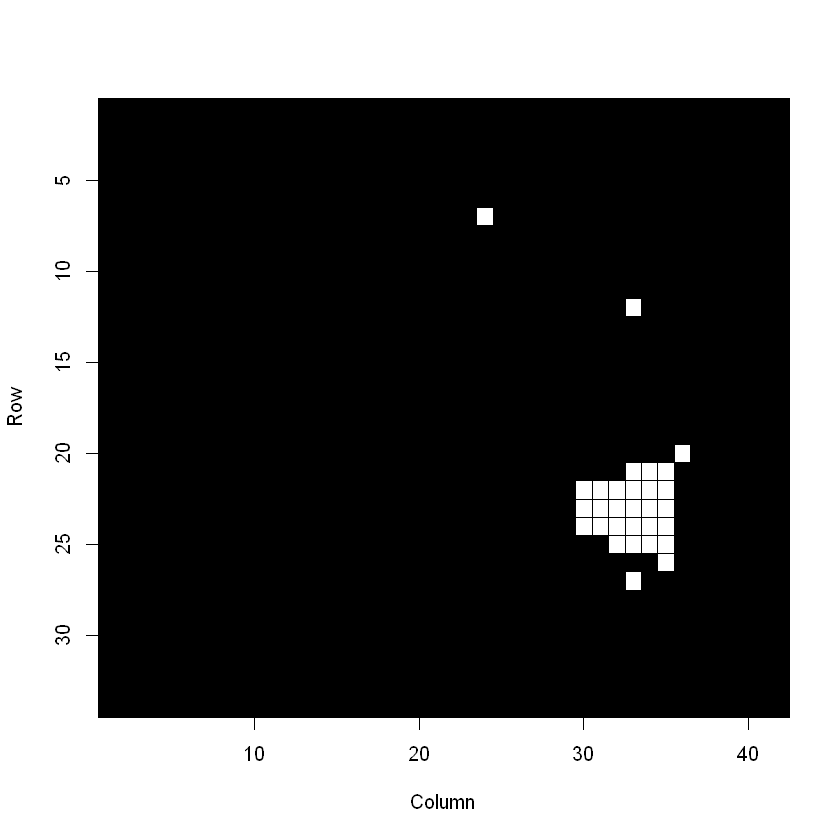

In [24]:
# 각 타구속도 그룹과 발사각도 그룹내의 타구들의 타율과 장타율을 확인하고, 해당 구간에서의 타율과 장타율이 각각
# 0.526, 1.5 이상인 그룹을 확인한다.

타율 <- matrix(0,nrow=length(levels(hts$HIT_ANG_G)),ncol=length(levels(hts$HIT_VEL_G)))
장타율 <- matrix(0,nrow=length(levels(hts$HIT_ANG_G)),ncol=length(levels(hts$HIT_VEL_G)))


for ( i in 1:nrow(타율) ){
  for ( j in 1:ncol(타율) ){
    ifelse(length(hts[(hts$HIT_VEL_G==levels(hts$HIT_VEL_G)[j] & hts$HIT_ANG_G==levels(hts$HIT_ANG_G)[i]),"안타"])==0,
           타율[i,j] <- 0,
           타율[i,j] <- round(sum(hts[(hts$HIT_VEL_G == levels(hts$HIT_VEL_G)[j] & 
                                       hts$HIT_ANG_G == levels(hts$HIT_ANG_G)[i]), "안타"])/length(hts[(hts$HIT_VEL_G == levels(hts$HIT_VEL_G)[j] &
                                                                                                        hts$HIT_ANG_G == levels(hts$HIT_ANG_G)[i]), "안타"]),3))
  }
}         



for ( i in 1:nrow(장타율) ){
  for ( j in 1:ncol(장타율) ){
    ifelse(length(hts[(hts$HIT_VEL_G==levels(hts$HIT_VEL_G)[j] & hts$HIT_ANG_G==levels(hts$HIT_ANG_G)[i]),"루타"])==0,
           장타율[i,j] <- 0,
           장타율[i,j] <- round(sum(hts[(hts$HIT_VEL_G == levels(hts$HIT_VEL_G)[j] & 
                                        hts$HIT_ANG_G == levels(hts$HIT_ANG_G)[i]), "루타"])/length(hts[(hts$HIT_VEL_G == levels(hts$HIT_VEL_G)[j] &
                                                                                                         hts$HIT_ANG_G == levels(hts$HIT_ANG_G)[i]), "루타"]),3))
  }
}         


barr<-matrix(0,nrow=length(levels(hts$HIT_ANG_G)),ncol=length(levels(hts$HIT_VEL_G)))
for ( i in 1:nrow(barr) ){
  for ( j in 1:ncol(barr) ){   
    ifelse((타율[i,j] >= 0.526 & 장타율[i,j] >=1.5) , barr[i,j] <- 1 , barr[i,j] <- 0)}}

color2D.matplot(barr)
print(barr)

tmp<-matrix(0,nrow=nrow(barr),ncol=ncol(barr))
for ( i in 1:nrow(barr) ){
  for ( j in 1:ncol(barr) ){
    tmp[i,j]<-nrow(hts[(hts$HIT_ANG_G==i & hts$HIT_VEL_G==j),])
  }}

In [25]:
# 세분화 1
# 배럴로 인정되는 그룹의 구간들을 더 세분화하여 배럴을 만족하는 타구속도와 발사각도를 구체화 하고자 한다.

for ( i in 1:nrow(hts) ){
  ifelse(hts$HIT_VEL[i] < 10 ,hts$HIT_VEL_G2[i]<-"1",
  ifelse(hts$HIT_VEL[i] < 15 ,hts$HIT_VEL_G2[i]<-"2",
  ifelse(hts$HIT_VEL[i] < 20 ,hts$HIT_VEL_G2[i]<-"3",
  ifelse(hts$HIT_VEL[i] < 25 ,hts$HIT_VEL_G2[i]<-"4",
  ifelse(hts$HIT_VEL[i] < 30 ,hts$HIT_VEL_G2[i]<-"5",
  ifelse(hts$HIT_VEL[i] < 35 ,hts$HIT_VEL_G2[i]<-"6",
  ifelse(hts$HIT_VEL[i] < 40 ,hts$HIT_VEL_G2[i]<-"7",
  ifelse(hts$HIT_VEL[i] < 45 ,hts$HIT_VEL_G2[i]<-"8",
  ifelse(hts$HIT_VEL[i] < 50 ,hts$HIT_VEL_G2[i]<-"9",
  ifelse(hts$HIT_VEL[i] < 55 ,hts$HIT_VEL_G2[i]<-"10",
  ifelse(hts$HIT_VEL[i] < 60 ,hts$HIT_VEL_G2[i]<-"11",
  ifelse(hts$HIT_VEL[i] < 65 ,hts$HIT_VEL_G2[i]<-"12",
  ifelse(hts$HIT_VEL[i] < 70 ,hts$HIT_VEL_G2[i]<-"13",
  ifelse(hts$HIT_VEL[i] < 75 ,hts$HIT_VEL_G2[i]<-"14",
  ifelse(hts$HIT_VEL[i] < 80 ,hts$HIT_VEL_G2[i]<-"15",
  ifelse(hts$HIT_VEL[i] < 85 ,hts$HIT_VEL_G2[i]<-"16",
  ifelse(hts$HIT_VEL[i] < 90 ,hts$HIT_VEL_G2[i]<-"17",
  ifelse(hts$HIT_VEL[i] < 95 ,hts$HIT_VEL_G2[i]<-"18",
  ifelse(hts$HIT_VEL[i] < 100 ,hts$HIT_VEL_G2[i]<-"19",
  ifelse(hts$HIT_VEL[i] < 105 ,hts$HIT_VEL_G2[i]<-"20",
  ifelse(hts$HIT_VEL[i] < 110 ,hts$HIT_VEL_G2[i]<-"21",
  ifelse(hts$HIT_VEL[i] < 115 ,hts$HIT_VEL_G2[i]<-"22",
  ifelse(hts$HIT_VEL[i] < 120 ,hts$HIT_VEL_G2[i]<-"23",
  ifelse(hts$HIT_VEL[i] < 125 ,hts$HIT_VEL_G2[i]<-"24",
  ifelse(hts$HIT_VEL[i] < 130 ,hts$HIT_VEL_G2[i]<-"25",
  ifelse(hts$HIT_VEL[i] < 135 ,hts$HIT_VEL_G2[i]<-"26",
  ifelse(hts$HIT_VEL[i] < 140 ,hts$HIT_VEL_G2[i]<-"27",
  ifelse(hts$HIT_VEL[i] < 145 ,hts$HIT_VEL_G2[i]<-"28",
  ifelse(hts$HIT_VEL[i] < 150 ,hts$HIT_VEL_G2[i]<-"29",
  ifelse(hts$HIT_VEL[i] < 152.5 ,hts$HIT_VEL_G2[i]<-"30",
  ifelse(hts$HIT_VEL[i] < 155 ,hts$HIT_VEL_G2[i]<-"31",
  ifelse(hts$HIT_VEL[i] < 157.5 ,hts$HIT_VEL_G2[i]<-"32",
  ifelse(hts$HIT_VEL[i] < 160 ,hts$HIT_VEL_G2[i]<-"33",
  ifelse(hts$HIT_VEL[i] < 162.5 ,hts$HIT_VEL_G2[i]<-"34",
  ifelse(hts$HIT_VEL[i] < 165 ,hts$HIT_VEL_G2[i]<-"35",
  ifelse(hts$HIT_VEL[i] < 167.5 ,hts$HIT_VEL_G2[i]<-"36",       
  ifelse(hts$HIT_VEL[i] < 170 ,hts$HIT_VEL_G2[i]<-"37",
  ifelse(hts$HIT_VEL[i] < 172.5 ,hts$HIT_VEL_G2[i]<-"38",
  ifelse(hts$HIT_VEL[i] < 175 ,hts$HIT_VEL_G2[i]<-"39",
  ifelse(hts$HIT_VEL[i] < 177.5 ,hts$HIT_VEL_G2[i]<-"40",
  ifelse(hts$HIT_VEL[i] < 180 ,hts$HIT_VEL_G2[i]<-"41",
  ifelse(hts$HIT_VEL[i] < 182.5 ,hts$HIT_VEL_G2[i]<-"42",
  ifelse(hts$HIT_VEL[i] < 185 ,hts$HIT_VEL_G2[i]<-"43",
  ifelse(hts$HIT_VEL[i] < 190 ,hts$HIT_VEL_G2[i]<-"44",
  ifelse(hts$HIT_VEL[i] < 195 ,hts$HIT_VEL_G2[i]<-"45",
  ifelse(hts$HIT_VEL[i] < 200 ,hts$HIT_VEL_G2[i]<-"46",
  ifelse(hts$HIT_VEL[i] < 205 ,hts$HIT_VEL_G2[i]<-"47",
  ifelse(hts$HIT_VEL[i] < 210 ,hts$HIT_VEL_G2[i]<-"48", hts$HIT_VEL_G2[i]<-"49"))))))))))))))))))))))))))))))))))))))))))))))))
}

hts$HIT_VEL_G2<-factor(hts$HIT_VEL_G2,levels=c(seq(1,49)))


for ( i in 1:nrow(hts)) {
  ifelse(hts$HIT_ANG_VER[i] < -80 , hts$HIT_ANG_G2[i] <- "1" , 
  ifelse(hts$HIT_ANG_VER[i] < -75, hts$HIT_ANG_G2[i] <- "2", 
  ifelse(hts$HIT_ANG_VER[i] < -70, hts$HIT_ANG_G2[i] <- "3", 
  ifelse(hts$HIT_ANG_VER[i] < -65, hts$HIT_ANG_G2[i] <- "4",
  ifelse(hts$HIT_ANG_VER[i] < -60, hts$HIT_ANG_G2[i] <- "5", 
  ifelse(hts$HIT_ANG_VER[i] < -55, hts$HIT_ANG_G2[i] <- "6", 
  ifelse(hts$HIT_ANG_VER[i] < -50, hts$HIT_ANG_G2[i] <- "7", 
  ifelse(hts$HIT_ANG_VER[i] < -45, hts$HIT_ANG_G2[i] <- "8", 
  ifelse(hts$HIT_ANG_VER[i] < -40, hts$HIT_ANG_G2[i] <- "9", 
  ifelse(hts$HIT_ANG_VER[i] < -35, hts$HIT_ANG_G2[i] <- "10", 
  ifelse(hts$HIT_ANG_VER[i] < -30, hts$HIT_ANG_G2[i] <- "11", 
  ifelse(hts$HIT_ANG_VER[i] < -25, hts$HIT_ANG_G2[i] <- "12", 
  ifelse(hts$HIT_ANG_VER[i] < -20, hts$HIT_ANG_G2[i] <- "13", 
  ifelse(hts$HIT_ANG_VER[i] < -15, hts$HIT_ANG_G2[i] <- "14", 
  ifelse(hts$HIT_ANG_VER[i] < -10, hts$HIT_ANG_G2[i] <- "15", 
  ifelse(hts$HIT_ANG_VER[i] < -5, hts$HIT_ANG_G2[i] <- "16", 
  ifelse(hts$HIT_ANG_VER[i] < 0, hts$HIT_ANG_G2[i] <- "17", 
  ifelse(hts$HIT_ANG_VER[i] < 5, hts$HIT_ANG_G2[i] <- "18", 
  ifelse(hts$HIT_ANG_VER[i] < 10, hts$HIT_ANG_G2[i] <- "19",
  ifelse(hts$HIT_ANG_VER[i] < 12.5, hts$HIT_ANG_G2[i] <- "20",       
  ifelse(hts$HIT_ANG_VER[i] < 15, hts$HIT_ANG_G2[i] <- "21", 
  ifelse(hts$HIT_ANG_VER[i] < 17.5, hts$HIT_ANG_G2[i] <- "22",       
  ifelse(hts$HIT_ANG_VER[i] < 20, hts$HIT_ANG_G2[i] <- "23", 
  ifelse(hts$HIT_ANG_VER[i] < 22.5, hts$HIT_ANG_G2[i] <- "24",
  ifelse(hts$HIT_ANG_VER[i] < 25, hts$HIT_ANG_G2[i] <- "25", 
  ifelse(hts$HIT_ANG_VER[i] < 30, hts$HIT_ANG_G2[i] <- "26", 
  ifelse(hts$HIT_ANG_VER[i] < 32.5, hts$HIT_ANG_G2[i] <- "27",
  ifelse(hts$HIT_ANG_VER[i] < 35, hts$HIT_ANG_G2[i] <- "28", 
  ifelse(hts$HIT_ANG_VER[i] < 37.5, hts$HIT_ANG_G2[i] <- "29",
  ifelse(hts$HIT_ANG_VER[i] < 40, hts$HIT_ANG_G2[i] <- "30", 
  ifelse(hts$HIT_ANG_VER[i] < 42.5, hts$HIT_ANG_G2[i] <- "31",
  ifelse(hts$HIT_ANG_VER[i] < 45, hts$HIT_ANG_G2[i] <- "32", 
  ifelse(hts$HIT_ANG_VER[i] < 47.5, hts$HIT_ANG_G2[i] <- "33",
  ifelse(hts$HIT_ANG_VER[i] < 50, hts$HIT_ANG_G2[i] <- "34", 
  ifelse(hts$HIT_ANG_VER[i] < 55, hts$HIT_ANG_G2[i] <- "35", 
  ifelse(hts$HIT_ANG_VER[i] < 60, hts$HIT_ANG_G2[i] <- "36", 
  ifelse(hts$HIT_ANG_VER[i] < 65, hts$HIT_ANG_G2[i] <- "37", 
  ifelse(hts$HIT_ANG_VER[i] < 70, hts$HIT_ANG_G2[i] <- "38", 
  ifelse(hts$HIT_ANG_VER[i] < 75, hts$HIT_ANG_G2[i] <- "39", 
  ifelse(hts$HIT_ANG_VER[i] < 80, hts$HIT_ANG_G2[i] <- "40", 
  hts$HIT_ANG_G2[i]<-"41"))))))))))))))))))))))))))))))))))))))))
}

hts$HIT_ANG_G2<-factor(hts$HIT_ANG_G2,levels=seq(1:42))

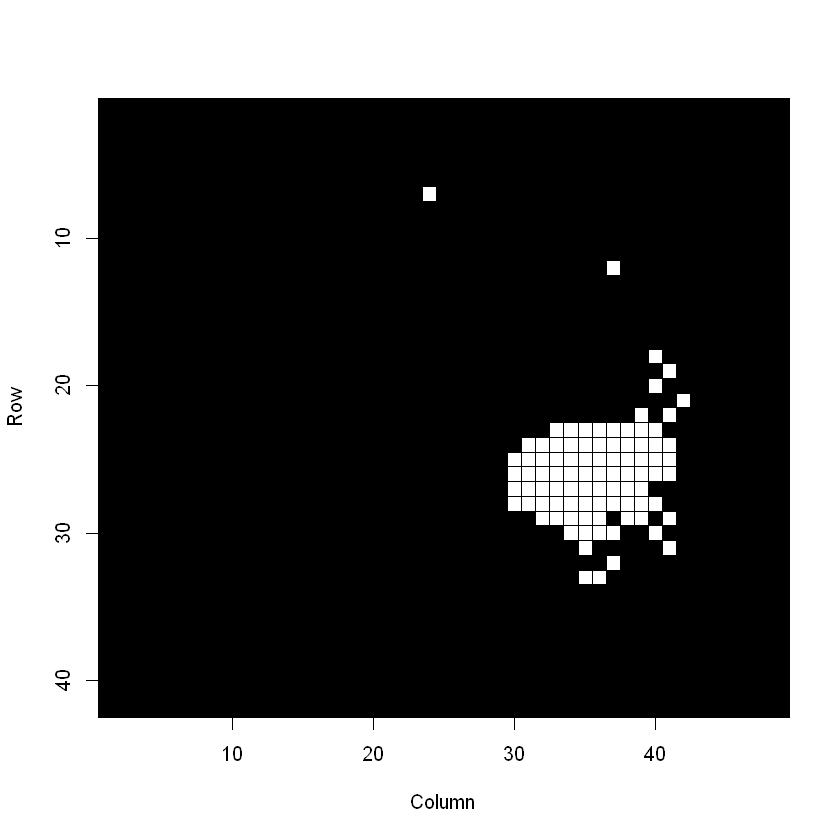

In [26]:
# 각 타구속도 그룹과 발사각도 그룹내의 타구들의 타율과 장타율을 확인하고, 해당 구간에서의 타율과 장타율이 각각
# 0.526, 1.5 이상인 그룹을 확인한다.

타율2 <- matrix(0,nrow=length(levels(hts$HIT_ANG_G2)),ncol=length(levels(hts$HIT_VEL_G2)))
장타율2 <- matrix(0,nrow=length(levels(hts$HIT_ANG_G2)),ncol=length(levels(hts$HIT_VEL_G2)))


for ( i in 1:nrow(타율2) ){
  for ( j in 1:ncol(타율2) ){
    ifelse(length(hts[(hts$HIT_VEL_G2==levels(hts$HIT_VEL_G2)[j] & hts$HIT_ANG_G2==levels(hts$HIT_ANG_G2)[i]),"안타"])==0,
           타율2[i,j] <- 0,
           타율2[i,j] <- round(sum(hts[(hts$HIT_VEL_G2 == levels(hts$HIT_VEL_G2)[j] & 
                                        hts$HIT_ANG_G2 == levels(hts$HIT_ANG_G2)[i]), "안타"])/length(hts[(hts$HIT_VEL_G2 == levels(hts$HIT_VEL_G2)[j] &
                                                                                                           hts$HIT_ANG_G2 == levels(hts$HIT_ANG_G2)[i]), "안타"]),3))
  }
}         



for ( i in 1:nrow(장타율2) ){
  for ( j in 1:ncol(장타율2) ){
    ifelse(length(hts[(hts$HIT_VEL_G2==levels(hts$HIT_VEL_G2)[j] & hts$HIT_ANG_G2==levels(hts$HIT_ANG_G2)[i]),"루타"])==0,
           장타율2[i,j] <- 0,
           장타율2[i,j] <- round(sum(hts[(hts$HIT_VEL_G2 == levels(hts$HIT_VEL_G2)[j] & 
                                         hts$HIT_ANG_G2 == levels(hts$HIT_ANG_G2)[i]), "루타"])/length(hts[(hts$HIT_VEL_G2 == levels(hts$HIT_VEL_G2)[j] &
                                                                                                            hts$HIT_ANG_G2 == levels(hts$HIT_ANG_G2)[i]), "루타"]),3))
  }
}         


barr2<-matrix(0,nrow=length(levels(hts$HIT_ANG_G2)),ncol=length(levels(hts$HIT_VEL_G2)))
for ( i in 1:nrow(barr2) ){
  for ( j in 1:ncol(barr2) ){   
    ifelse((타율2[i,j] >= 0.526 & 장타율2[i,j] >=1.5) , barr2[i,j] <- 1 , barr2[i,j] <- 0)}}

color2D.matplot(barr2)

tmp2<-matrix(0,nrow=nrow(barr2),ncol=ncol(barr2))
for ( i in 1:nrow(barr2) ){
  for ( j in 1:ncol(barr2) ){
    tmp2[i,j]<-nrow(hts[(hts$HIT_ANG_G2==i & hts$HIT_VEL_G2==j),])
  }}

In [27]:
# 세분화 2
# 타속이 일정 수준을 넘어가면 관측치 수가 적어지기 때문에 이전에 세분화한 그룹들을 다시 합친다
# 세분화 1에서 진행한 타속그룹에서 (40,41)그룹, (42,43)그룹, (44~) 그룹을 하나로 합친다.
for ( i in 1:nrow(hts) ){
  ifelse(hts$HIT_VEL[i] < 10 ,hts$HIT_VEL_G3[i]<-"1",
  ifelse(hts$HIT_VEL[i] < 15 ,hts$HIT_VEL_G3[i]<-"2",
  ifelse(hts$HIT_VEL[i] < 20 ,hts$HIT_VEL_G3[i]<-"3",
  ifelse(hts$HIT_VEL[i] < 25 ,hts$HIT_VEL_G3[i]<-"4",
  ifelse(hts$HIT_VEL[i] < 30 ,hts$HIT_VEL_G3[i]<-"5",
  ifelse(hts$HIT_VEL[i] < 35 ,hts$HIT_VEL_G3[i]<-"6",
  ifelse(hts$HIT_VEL[i] < 40 ,hts$HIT_VEL_G3[i]<-"7",
  ifelse(hts$HIT_VEL[i] < 45 ,hts$HIT_VEL_G3[i]<-"8",
  ifelse(hts$HIT_VEL[i] < 50 ,hts$HIT_VEL_G3[i]<-"9",
  ifelse(hts$HIT_VEL[i] < 55 ,hts$HIT_VEL_G3[i]<-"10",
  ifelse(hts$HIT_VEL[i] < 60 ,hts$HIT_VEL_G3[i]<-"11",
  ifelse(hts$HIT_VEL[i] < 65 ,hts$HIT_VEL_G3[i]<-"12",
  ifelse(hts$HIT_VEL[i] < 70 ,hts$HIT_VEL_G3[i]<-"13",
  ifelse(hts$HIT_VEL[i] < 75 ,hts$HIT_VEL_G3[i]<-"14",
  ifelse(hts$HIT_VEL[i] < 80 ,hts$HIT_VEL_G3[i]<-"15",
  ifelse(hts$HIT_VEL[i] < 85 ,hts$HIT_VEL_G3[i]<-"16",
  ifelse(hts$HIT_VEL[i] < 90 ,hts$HIT_VEL_G3[i]<-"17",
  ifelse(hts$HIT_VEL[i] < 95 ,hts$HIT_VEL_G3[i]<-"18",
  ifelse(hts$HIT_VEL[i] < 100 ,hts$HIT_VEL_G3[i]<-"19",
  ifelse(hts$HIT_VEL[i] < 105 ,hts$HIT_VEL_G3[i]<-"20",
  ifelse(hts$HIT_VEL[i] < 110 ,hts$HIT_VEL_G3[i]<-"21",
  ifelse(hts$HIT_VEL[i] < 115 ,hts$HIT_VEL_G3[i]<-"22",
  ifelse(hts$HIT_VEL[i] < 120 ,hts$HIT_VEL_G3[i]<-"23",
  ifelse(hts$HIT_VEL[i] < 125 ,hts$HIT_VEL_G3[i]<-"24",
  ifelse(hts$HIT_VEL[i] < 130 ,hts$HIT_VEL_G3[i]<-"25",
  ifelse(hts$HIT_VEL[i] < 135 ,hts$HIT_VEL_G3[i]<-"26",
  ifelse(hts$HIT_VEL[i] < 140 ,hts$HIT_VEL_G3[i]<-"27",
  ifelse(hts$HIT_VEL[i] < 145 ,hts$HIT_VEL_G3[i]<-"28",
  ifelse(hts$HIT_VEL[i] < 150 ,hts$HIT_VEL_G3[i]<-"29",
  ifelse(hts$HIT_VEL[i] < 152.5 ,hts$HIT_VEL_G3[i]<-"30",
  ifelse(hts$HIT_VEL[i] < 155 ,hts$HIT_VEL_G3[i]<-"31",
  ifelse(hts$HIT_VEL[i] < 157.5 ,hts$HIT_VEL_G3[i]<-"32",
  ifelse(hts$HIT_VEL[i] < 160 ,hts$HIT_VEL_G3[i]<-"33",
  ifelse(hts$HIT_VEL[i] < 162.5 ,hts$HIT_VEL_G3[i]<-"34",
  ifelse(hts$HIT_VEL[i] < 165 ,hts$HIT_VEL_G3[i]<-"35",
  ifelse(hts$HIT_VEL[i] < 167.5 ,hts$HIT_VEL_G3[i]<-"36",       
  ifelse(hts$HIT_VEL[i] < 170 ,hts$HIT_VEL_G3[i]<-"37",
  ifelse(hts$HIT_VEL[i] < 172.5 ,hts$HIT_VEL_G3[i]<-"38",
  ifelse(hts$HIT_VEL[i] < 175 ,hts$HIT_VEL_G3[i]<-"39",
  ifelse(hts$HIT_VEL[i] < 180 ,hts$HIT_VEL_G3[i]<-"40",
  ifelse(hts$HIT_VEL[i] < 185 ,hts$HIT_VEL_G3[i]<-"41",
  hts$HIT_VEL_G2[i]<-"42")))))))))))))))))))))))))))))))))))))))))
}

hts$HIT_VEL_G3<-factor(hts$HIT_VEL_G3,levels=c(seq(1,42)))



for ( i in 1:nrow(hts)) {
  ifelse(hts$HIT_ANG_VER[i] < -80 , hts$HIT_ANG_G3[i] <- "1" , 
  ifelse(hts$HIT_ANG_VER[i] < -75, hts$HIT_ANG_G3[i] <- "2", 
  ifelse(hts$HIT_ANG_VER[i] < -70, hts$HIT_ANG_G3[i] <- "3", 
  ifelse(hts$HIT_ANG_VER[i] < -65, hts$HIT_ANG_G3[i] <- "4",
  ifelse(hts$HIT_ANG_VER[i] < -60, hts$HIT_ANG_G3[i] <- "5", 
  ifelse(hts$HIT_ANG_VER[i] < -55, hts$HIT_ANG_G3[i] <- "6", 
  ifelse(hts$HIT_ANG_VER[i] < -50, hts$HIT_ANG_G3[i] <- "7", 
  ifelse(hts$HIT_ANG_VER[i] < -45, hts$HIT_ANG_G3[i] <- "8", 
  ifelse(hts$HIT_ANG_VER[i] < -40, hts$HIT_ANG_G3[i] <- "9", 
  ifelse(hts$HIT_ANG_VER[i] < -35, hts$HIT_ANG_G3[i] <- "10", 
  ifelse(hts$HIT_ANG_VER[i] < -30, hts$HIT_ANG_G3[i] <- "11", 
  ifelse(hts$HIT_ANG_VER[i] < -25, hts$HIT_ANG_G3[i] <- "12", 
  ifelse(hts$HIT_ANG_VER[i] < -20, hts$HIT_ANG_G3[i] <- "13", 
  ifelse(hts$HIT_ANG_VER[i] < -15, hts$HIT_ANG_G3[i] <- "14", 
  ifelse(hts$HIT_ANG_VER[i] < -10, hts$HIT_ANG_G3[i] <- "15", 
  ifelse(hts$HIT_ANG_VER[i] < -5, hts$HIT_ANG_G3[i] <- "16", 
  ifelse(hts$HIT_ANG_VER[i] < 0, hts$HIT_ANG_G3[i] <- "17", 
  ifelse(hts$HIT_ANG_VER[i] < 5, hts$HIT_ANG_G3[i] <- "18", 
  ifelse(hts$HIT_ANG_VER[i] < 10, hts$HIT_ANG_G3[i] <- "19",
  ifelse(hts$HIT_ANG_VER[i] < 12.5, hts$HIT_ANG_G3[i] <- "20",       
  ifelse(hts$HIT_ANG_VER[i] < 15, hts$HIT_ANG_G3[i] <- "21", 
  ifelse(hts$HIT_ANG_VER[i] < 17.5, hts$HIT_ANG_G3[i] <- "22",       
  ifelse(hts$HIT_ANG_VER[i] < 20, hts$HIT_ANG_G3[i] <- "23", 
  ifelse(hts$HIT_ANG_VER[i] < 22.5, hts$HIT_ANG_G3[i] <- "24",
  ifelse(hts$HIT_ANG_VER[i] < 25, hts$HIT_ANG_G3[i] <- "25", 
  ifelse(hts$HIT_ANG_VER[i] < 30, hts$HIT_ANG_G3[i] <- "26", 
  ifelse(hts$HIT_ANG_VER[i] < 32.5, hts$HIT_ANG_G3[i] <- "27",
  ifelse(hts$HIT_ANG_VER[i] < 35, hts$HIT_ANG_G3[i] <- "28", 
  ifelse(hts$HIT_ANG_VER[i] < 37.5, hts$HIT_ANG_G3[i] <- "29",
  ifelse(hts$HIT_ANG_VER[i] < 40, hts$HIT_ANG_G3[i] <- "30", 
  ifelse(hts$HIT_ANG_VER[i] < 42.5, hts$HIT_ANG_G3[i] <- "31",
  ifelse(hts$HIT_ANG_VER[i] < 45, hts$HIT_ANG_G3[i] <- "32", 
  ifelse(hts$HIT_ANG_VER[i] < 47.5, hts$HIT_ANG_G3[i] <- "33",
  ifelse(hts$HIT_ANG_VER[i] < 50, hts$HIT_ANG_G3[i] <- "34", 
  ifelse(hts$HIT_ANG_VER[i] < 55, hts$HIT_ANG_G3[i] <- "35", 
  ifelse(hts$HIT_ANG_VER[i] < 60, hts$HIT_ANG_G3[i] <- "36", 
  ifelse(hts$HIT_ANG_VER[i] < 65, hts$HIT_ANG_G3[i] <- "37", 
  ifelse(hts$HIT_ANG_VER[i] < 70, hts$HIT_ANG_G3[i] <- "38", 
  ifelse(hts$HIT_ANG_VER[i] < 75, hts$HIT_ANG_G3[i] <- "39", 
  ifelse(hts$HIT_ANG_VER[i] < 80, hts$HIT_ANG_G3[i] <- "40", 
  hts$HIT_ANG_G3[i]<-"41"))))))))))))))))))))))))))))))))))))))))
}

hts$HIT_ANG_G3<-factor(hts$HIT_ANG_G3,levels=seq(1:42))

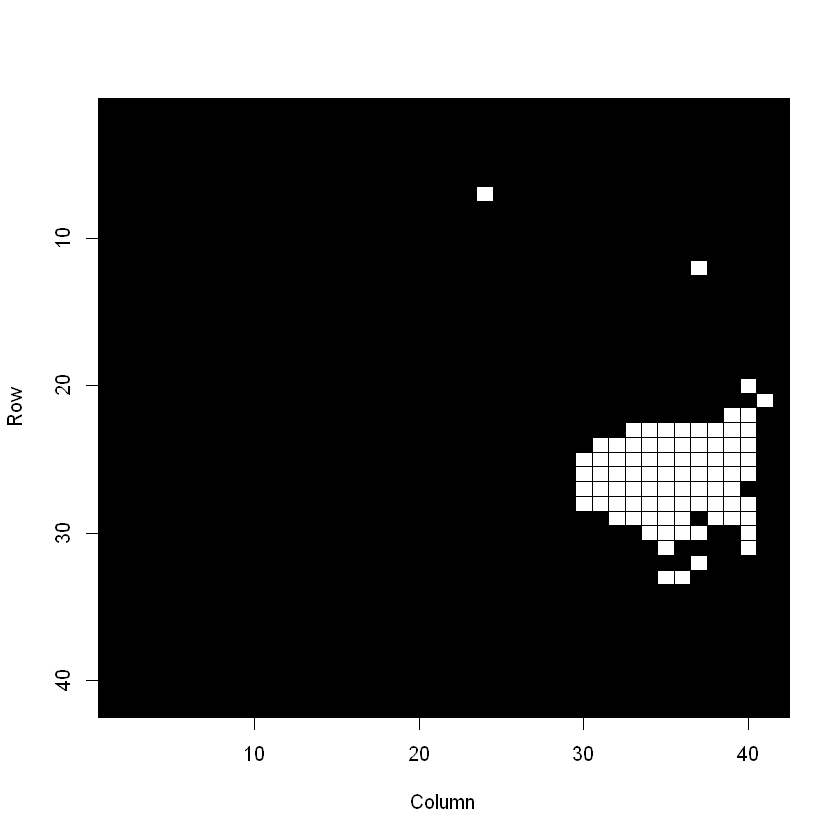

In [28]:
# 각 타구속도 그룹과 발사각도 그룹내의 타구들의 타율과 장타율을 확인하고, 해당 구간에서의 타율과 장타율이 각각
# 0.526, 1.5 이상인 그룹을 확인한다.

타율3 <- matrix(0,nrow=length(levels(hts$HIT_ANG_G3)),ncol=length(levels(hts$HIT_VEL_G3)))
장타율3 <- matrix(0,nrow=length(levels(hts$HIT_ANG_G3)),ncol=length(levels(hts$HIT_VEL_G3)))


for ( i in 1:nrow(타율3) ){
  for ( j in 1:ncol(타율3) ){
    ifelse(length(hts[(hts$HIT_VEL_G3==levels(hts$HIT_VEL_G3)[j] & hts$HIT_ANG_G3==levels(hts$HIT_ANG_G3)[i]),"안타"])==0,
           타율3[i,j] <- 0,
           타율3[i,j] <- round(sum(hts[(hts$HIT_VEL_G3 == levels(hts$HIT_VEL_G3)[j] & 
                                        hts$HIT_ANG_G3 == levels(hts$HIT_ANG_G3)[i]), "안타"])/length(hts[(hts$HIT_VEL_G3 == levels(hts$HIT_VEL_G3)[j] &
                                                                                                           hts$HIT_ANG_G3 == levels(hts$HIT_ANG_G3)[i]), "안타"]),3))
  }
}         



for ( i in 1:nrow(장타율3) ){
  for ( j in 1:ncol(장타율3) ){
    ifelse(length(hts[(hts$HIT_VEL_G3==levels(hts$HIT_VEL_G3)[j] & hts$HIT_ANG_G3==levels(hts$HIT_ANG_G3)[i]),"루타"])==0,
           장타율3[i,j] <- 0,
           장타율3[i,j] <- round(sum(hts[(hts$HIT_VEL_G3 == levels(hts$HIT_VEL_G3)[j] & 
                                         hts$HIT_ANG_G3 == levels(hts$HIT_ANG_G3)[i]), "루타"])/length(hts[(hts$HIT_VEL_G3 == levels(hts$HIT_VEL_G3)[j] &
                                                                                                            hts$HIT_ANG_G3 == levels(hts$HIT_ANG_G3)[i]), "루타"]),3))
  }
}         


barr3<-matrix(0,nrow=length(levels(hts$HIT_ANG_G3)),ncol=length(levels(hts$HIT_VEL_G3)))
for ( i in 1:nrow(barr3) ){
  for ( j in 1:ncol(barr3) ){   
    ifelse((타율3[i,j] >= 0.526 & 장타율3[i,j] >=1.5) , barr3[i,j] <- 1 , barr3[i,j] <- 0)}}

color2D.matplot(barr3)

tmp3<-matrix(0,nrow=nrow(barr3),ncol=ncol(barr3))
for ( i in 1:nrow(barr3) ){
  for ( j in 1:ncol(barr3) ){
    tmp3[i,j]<-nrow(hts[(hts$HIT_ANG_G3==i & hts$HIT_VEL_G3==j),])
  }}

### 배럴타구 범위의 연장

In [29]:
# 물리적으로 홈런이 가능한 타구의 발사속도와 발사각도를 추정한다.
# 계산을 함에 있어, 공기저항을 고려하여 포물선 공식을 통해 계산한다.
# 또한, 추가적인 가정하에 계산을 진행한다.
# 1. 야구공은 매끈한 구의 형태를 띄며 회전은 없다고 가정한다.
# 2. 경기장의 바람은 불지 않으며, 밀도는 1기압 25도 가정 하에 1.205 kg/m3으로 가정한다.
# 3. 공의 질량은 145g, 단면적은 0.00435 m^2으로 가정 하에 비거리 계산
#
# 회전을 고려하지 않았기 때문에, 마그누스 힘을 고려하지 못하여 실제 비거리와 차이가 생길 것이다.

hts$mps<-hts$HIT_VEL/3.6   #km/h -> m/s
g<-9.80665   #중력가속도
m<-0.145   #질량(kg)
r<-1.205   #밀도
a<-0.00435   #단면적(m^2)
cd<-pi*0.11/2.54 + 0.236      #항력계수
al<-0.5*r*a*cd
be<-m*g/al
A<-al*sqrt(be)/m


hts$dist<-((hts$mps)^2)*sin(2*hts$HIT_ANG_VER)/g
hts$ang<-hts$HIT_ANG_VER*pi/180   #라디안으로 변경
hts$vy<-hts$mps*sin(hts$ang)      #y축 발사속도
hts$vx<-hts$mps*cos(hts$ang)      #x축 발사속도
hts$time<-2*atan(hts$vy/sqrt(be))*m/(al*sqrt(be))
range(hts[hts$HIT_RESULT=="홈런","vy"])
2*atan(35/sqrt(be))*m/(al*sqrt(be))
(m/al)*(log(al*32.3*2*atan(35/sqrt(be))*m/(al*sqrt(be))+m)-log(m))
32/sin(atan(32/35))*3.6
hts1<-hts[hts$ang > 0 ,]
hts1$dx<-(m/al)*(log(al*hts1$vx*hts1$time+m)-log(m))



hts1[hts1$dx >= 124, "HIT_RESULT"]
# 계산한 거리와 실제 hts자료를 비교해본 결과, 계산한 거리가 124m가 넘어가는 타구들은
# 모두 홈런인 타구였다. 따라서 124m를 넘기는 타구를 배럴타구로 여긴다.

# hts데이터에서 홈런인 타구의 발사각도의 범위를 조금 더 확장시킨 경우와 타구속도의 범위에서 최소값을 조금 더 확장을 시켜,
# 실제 나올 수 있는 값들에 대해서 배럴타구의 범위를 확장시킨다.

range(hts[hts$HIT_RESULT=="홈런","HIT_VEL"])
range(hts[hts$HIT_RESULT=="홈런","HIT_ANG_VER"])

# hts데이터에서 홈런인 타구의 최소 속도는 131.13(km/h) 이고, 최소 각도는 15.5도이며, 최대각도는 50.1도이다.
# 따라서 130km/h 이상인 타구와, 14도 ~ 52도 내에 존재하는 타구들의 비거리를 계산하여,
# 계산한 비거리가 124 이상인 범위를 확인한다.

s_test<-seq(131,220,by=0.1)/3.6
s_test[3]
a_test<-seq(14,52,by=0.1)*pi/180
tmp_sa<-matrix(0,nrow=length(a_test),ncol=length(s_test))
for ( i in 1:length(a_test) ){
  for ( j in 1:length(s_test) ){
    tmp_sa[i,j]<-((m/al)*(log(al*(s_test[j]*cos(a_test[i]))*(2*atan((s_test[j]*sin(a_test[i]))/sqrt(be))*m/(al*sqrt(be)))+m)-log(m)))
  }
}
tmp_sa

tmp_sa1<-tmp_sa
for ( i in 1:length(a_test)){
  for ( j in 1:length(s_test)){
    ifelse(tmp_sa[i,j] >= 124, tmp_sa1[i,j]<-1, tmp_sa1[i,j]<-0)
  }
}


write.table(tmp_sa1,"홈런 가능 타구.csv",sep=',',col.names=seq(131,220,by=0.1),row.names=seq(14,52,by=0.1))

[1] 11.33252 34.34115

[1] 5.777758

[1] 120.9173

[1] 170.725

[1] 홈런 홈런 홈런 홈런
17 Levels: 1루타 2루타 3루타 내야안타(1루타) 땅볼아웃 번트아웃 ... 삼중살타

[1] 131.13 179.02

[1] 15.5 50.1

[1] 36.44444

52.03595,52.10186,52.16779,52.23373,52.29969,52.36566,52.43166,52.49767,52.56370,52.62975,...,113.0053,113.0744,113.1435,113.2125,113.2816,113.3507,113.4197,113.4888,113.5578,113.6268
52.31316,52.37935,52.44555,52.51177,52.57801,52.64426,52.71053,52.77682,52.84313,52.90945,...,113.4746,113.5439,113.6131,113.6823,113.7515,113.8207,113.8899,113.9591,114.0283,114.0975
52.58913,52.65559,52.72206,52.78856,52.85507,52.92160,52.98815,53.05471,53.12129,53.18789,...,113.9407,114.0101,114.0794,114.1488,114.2181,114.2875,114.3569,114.4262,114.4955,114.5649
52.86384,52.93057,52.99733,53.06409,53.13088,53.19768,53.26450,53.33134,53.39819,53.46506,...,114.4034,114.4730,114.5425,114.6120,114.6815,114.7510,114.8205,114.8900,114.9595,115.0289
53.13731,53.20432,53.27134,53.33838,53.40543,53.47251,53.53960,53.60671,53.67383,53.74097,...,114.8629,114.9326,115.0023,115.0719,115.1416,115.2112,115.2809,115.3505,115.4201,115.4897
53.40954,53.47682,53.54411,53.61141,53.67874,53.74608,53.81344,53.88082,53.94821,54.01562,...,115.3192,115.3890,115.4588,115.5286,115.5984,115.6682,115.7380,115.8078,115.8775,115.9473
53.68053,53.74807,53.81563,53.88321,53.95080,54.01841,54.08603,54.15368,54.22134,54.28901,...,115.7723,115.8422,115.9122,115.9821,116.0521,116.1220,116.1919,116.2618,116.3317,116.4016
53.95028,54.01809,54.08591,54.15375,54.22161,54.28948,54.35737,54.42528,54.49321,54.56115,...,116.2222,116.2923,116.3623,116.4324,116.5025,116.5726,116.6426,116.7127,116.7827,116.8527
54.21880,54.28687,54.35495,54.42306,54.49118,54.55931,54.62747,54.69564,54.76382,54.83203,...,116.6689,116.7391,116.8093,116.8795,116.9497,117.0199,117.0901,117.1603,117.2305,117.3007
54.48608,54.55441,54.62276,54.69112,54.75950,54.82790,54.89631,54.96474,55.03319,55.10166,...,117.1124,117.1828,117.2532,117.3235,117.3938,117.4642,117.5345,117.6048,117.6751,117.7454
54.75212,54.82072,54.88932,54.95795,55.02659,55.09524,55.16392,55.23261,55.30131,55.37003,...,117.5529,117.6234,117.6938,117.7643,117.8348,117.9053,117.9757,118.0462,118.1166,118.1870


In [30]:
# 최종 배럴 데이터 생성
# barr3 그래프에서 [7,24],[12,37]의 경우 관측치가 1이며, 배럴타구로 보기 힘들다고 판단하여
# 배럴타구의 범주에 포함시키지 않는다.

for ( i in 1:nrow(hts)){
  ifelse((hts$HIT_ANG_G3[i] %in% c(25:28) & hts$HIT_VEL_G3[i]==30),hts$barrel[i]<-1,
  ifelse((hts$HIT_ANG_G3[i] %in% c(24:28) & hts$HIT_VEL_G3[i]==31),hts$barrel[i]<-1,
  ifelse((hts$HIT_ANG_G3[i] %in% c(24:29) & hts$HIT_VEL_G3[i]==32),hts$barrel[i]<-1,
  ifelse((hts$HIT_ANG_G3[i] %in% c(23:29) & hts$HIT_VEL_G3[i]==33),hts$barrel[i]<-1,
  ifelse((hts$HIT_ANG_G3[i] %in% c(23:30) & hts$HIT_VEL_G3[i]==34),hts$barrel[i]<-1,
  ifelse((hts$HIT_ANG_G3[i] %in% c(23:31,33) & hts$HIT_VEL_G3[i]==35),hts$barrel[i]<-1,
  ifelse((hts$HIT_ANG_G3[i] %in% c(23:30,33) & hts$HIT_VEL_G3[i]==36),hts$barrel[i]<-1,
  ifelse((hts$HIT_ANG_G3[i] %in% c(23:28,30,32) & hts$HIT_VEL_G3[i]==37),hts$barrel[i]<-1,
  ifelse((hts$HIT_ANG_G3[i] %in% c(23:29) & hts$HIT_VEL_G3[i]==38),hts$barrel[i]<-1,
  ifelse((hts$HIT_ANG_G3[i] %in% c(22:29) & hts$HIT_VEL_G3[i]==39),hts$barrel[i]<-1,
  ifelse((hts$HIT_ANG_G3[i] %in% c(20,22:26,28:31) & hts$HIT_VEL_G3[i]==40),hts$barrel[i]<-1,
  ifelse((hts$HIT_ANG_G3[i] ==21 & hts$HIT_VEL_G3[i]==41),hts$barrel[i]<-1,
  ifelse((hts$HIT_ANG_VER[i] > 0 &((m/al)*(log(al*((hts$HIT_VEL[i]/3.6)*cos(hts$HIT_ANG_VER[i]*pi/180))*(2*atan(((hts$HIT_VEL[i]/3.6)*sin(hts$HIT_ANG_VER[i]*pi/180))/sqrt(be))*m/(al*sqrt(be)))+m)-log(m)))>=124),hts$barrel[i]<-1,hts$barrel[i]<-0)))))))))))))
}

hts_b_2018<-cbind(hts_2018,hts[hts$GYEAR==2018,"barrel"])
hts_b_2019<-cbind(hts_2019,hts[hts$GYEAR==2019,"barrel"])
hts_b_2020<-cbind(hts_2020,hts[hts$GYEAR==2020,"barrel"])
hts_b_2021<-cbind(hts_2021,hts[hts$GYEAR==2021,"barrel"])


#write.table(hts_b_2018,"hts_barrel_2018.csv",sep=',')
#write.table(hts_b_2019,"hts_barrel_2019.csv",sep=',')
#write.table(hts_b_2020,"hts_barrel_2020.csv",sep=',')
#write.table(hts_b_2021,"hts_barrel_2021.csv",sep=',')

Warning message in log(al * ((hts$HIT_VEL[i]/3.6) * cos(hts$HIT_ANG_VER[i] * pi/180)) * :
"NaN이 생성되었습니다"Warning message in log(al * ((hts$HIT_VEL[i]/3.6) * cos(hts$HIT_ANG_VER[i] * pi/180)) * :
"NaN이 생성되었습니다"

### 모델링을 위한 데이터 생성

In [31]:
#final데이터 불러오기 (추가자료 첨부)
final = read.csv('./final_0816.csv', header = T, stringsAsFactors = F)

In [32]:
#배럴 칼럼명 변경
colnames(hts_b_2018)[12]<-"barrels"
colnames(hts_b_2019)[12]<-"barrels"
colnames(hts_b_2020)[12]<-"barrels"
colnames(hts_b_2021)[12]<-"barrels"

In [33]:
#선수별로 배럴 count
barrel_2018 = hts_b_2018 %>% group_by(PCODE) %>% summarise(N = n(), barrels_count = sum(barrels, na.rm = TRUE),
                                                                  barrels_p = barrels_count/N)
barrel_2019 = hts_b_2019 %>% group_by(PCODE) %>% summarise(N = n(), barrels_count = sum(barrels, na.rm = TRUE),
                                                                  barrels_p = barrels_count/N)
barrel_2020 = hts_b_2020 %>% group_by(PCODE) %>% summarise(N = n(), barrels_count = sum(barrels, na.rm = TRUE),
                                                                  barrels_p = barrels_count/N)
barrel_2021 = hts_b_2021 %>% group_by(PCODE) %>% summarise(N = n(), barrels_count = sum(barrels, na.rm = TRUE),
                                                                  barrels_p = barrels_count/N)

In [34]:
#년도를 나타내는 칼럼 생성
barrel_2018['GYEAR'] = 2018; barrel_2019['GYEAR'] = 2019
barrel_2020['GYEAR'] = 2020; barrel_2021['GYEAR'] = 2021

In [35]:
#배럴 데이터 합치기
barrels = rbind(barrel_2018, barrel_2019, barrel_2020, barrel_2021)
barrels

PCODE,N,barrels_count,barrels_p,GYEAR
60100,97,4,0.04123711,2018
60184,7,1,0.14285714,2018
60288,1,0,0.00000000,2018
60343,107,6,0.05607477,2018
60456,6,0,0.00000000,2018
60523,118,11,0.09322034,2018
60558,216,13,0.06018519,2018
60566,157,0,0.00000000,2018
60605,63,1,0.01587302,2018
60648,1,0,0.00000000,2018


In [36]:
#final X칼럼 삭제
final = final[,-1]

In [37]:
#final데이터에 합치기
final_barrels = merge(final, barrels, on = c('PCODE', 'GYEAR'), all.x = TRUE)

In [38]:
write.csv(final_barrels, 'final_barrels.csv')

### 시각화 코드 및 이상치 기준 설정

In [39]:
finalbarrels <- final_barrels
nrow(finalbarrels)#1501

#비대응 값 NA로 나오기 때문에 제거
finalbarrels2<-na.omit(finalbarrels)
nrow(finalbarrels2)#1065
sum(is.na(finalbarrels2))#0

#9999값 NA로 변환 후 제거
for (i in 1:ncol(finalbarrels2)){
 finalbarrels2[which(finalbarrels2[,i]==9999,),]<-NA
  
}
sum(is.na(finalbarrels2))#80

finalbarrels3<-na.omit(finalbarrels2)
sum(is.na(finalbarrels3))#0
nrow(finalbarrels3)#1063

[1] 1501

[1] 1065

[1] 0

[1] 78

[1] 0

[1] 1063

In [40]:
#규정타석의 5퍼센트 기준으로 자르기
finalbarrels4<-finalbarrels3%>%
  filter( ifelse(GYEAR==2021,타석>=13,타석>=23))%>%
  select(c(18,19,20,8,27,25,24,39))
colnames(finalbarrels4)[5]<-"wRC/27"

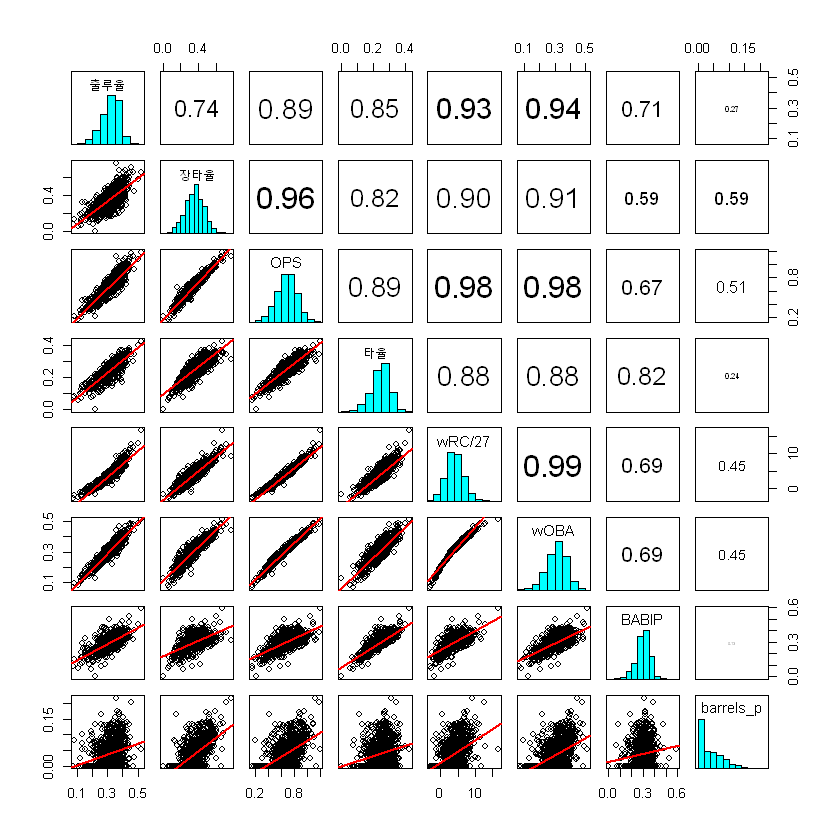

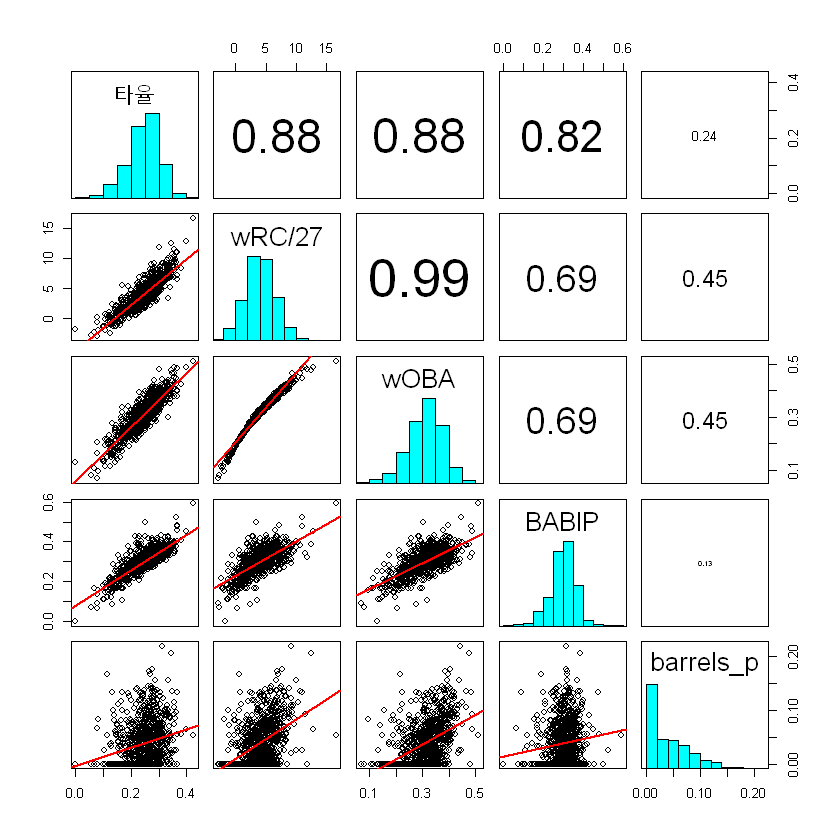

In [41]:
#산점도 행렬 시각화 코드
panel.hist <- function(x, ...)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(usr[1:2], 0, 1.5) )
  h <- hist(x, plot = FALSE)
  breaks <- h$breaks; nB <- length(breaks)
  y <- h$counts; y <- y/max(y)
  rect(breaks[-nB], 0, breaks[-1], y, col = "cyan", ...)
} 

panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor, ...)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(0, 1, 0, 1))
  r <- abs(cor(x, y))
  txt <- format(c(r, 0.123456789), digits = digits)[1]
  txt <- paste0(prefix, txt)
  if(missing(cex.cor)) cex.cor <- 0.8/strwidth(txt)
  text(0.5, 0.5, txt, cex = cex.cor * r)
} 

panel.lm <- function(x, y, col=par("col"), bg=NA, pch=par("pch"),
                     cex=1, col.smooth="red", ...) {
  points(x, y, pch=pch, col=col, bg=bg, cex=cex)
  abline(stats::lm(y~x), col=col.smooth, lwd=2,...)
} 
#종속변수와 독립변수 모두 시각화
pairs(finalbarrels4,
      lower.panel = panel.lm, 
      upper.panel = panel.cor, 
      diag.panel = panel.hist 
      )
#독립변수만 시각화
pairs(finalbarrels4[,-c(1,2,3)],
      lower.panel = panel.lm, 
      upper.panel = panel.cor, 
      diag.panel = panel.hist 
)

In [42]:
###OPS에 대한 다중공선성 체크###
ops_lm<-lm(data=finalbarrels4[-c(1,2)],OPS~.) #(타율, wRC/27, wOBA, BABIP, barrels_p)  
vif(ops_lm) #wRC+와 wOBA의 값이 매우 큼 
ops_lm2<-lm(data=finalbarrels4[-c(1,2,5)],OPS~.) #wRC/27빼고, (타율, wOBA, BABIP, barrels_p)
vif(ops_lm2) #10 보다 작음
ops_lm3<-lm(data=finalbarrels4[-c(1,2,6)],OPS~.) #wOBA빼고, (타율, wRC/27, BABIP, barrels_p)
vif(ops_lm3) #10 보다 작음

###출루율에 대한 다중공선성 체크###
obp_lm<-lm(data=finalbarrels4[-c(2,3,8)],출루율~.) #(타율, wRC/27, wOBA, BABIP)  
vif(obp_lm) #wRC/27와 wOBA의 값이 매우 큼 
obp_lm2<-lm(data=finalbarrels4[-c(2,3,5,8)],출루율~.) #wRC/27빼고, (타율, wOBA, BABIP)
vif(obp_lm2) #10 보다 작음
obp_lm3<-lm(data=finalbarrels4[-c(2,3,6,8)],출루율~.) #wOBA빼고, (타율, wRC/27, BABIP)
vif(obp_lm3) #10 보다 작음

###장타율에 대한 다중공선성 체크###
slg_lm<-lm(data=finalbarrels4[-c(1,3)],장타율~.) #(타율, wRC/27, wOBA, BABIP, barrels_p)  
vif(slg_lm) #wRC/27와 wOBA의 값이 매우 큼 
slg_lm2<-lm(data=finalbarrels4[-c(1,3,5)],장타율~.) #wRC/27빼고, (타율, wOBA, BABIP, barrels_p)
vif(slg_lm2) #10 보다 작음
slg_lm3<-lm(data=finalbarrels4[-c(1,3,6)],장타율~.) #wRC/27빼고, (타율, wOBA, BABIP, barrels_p)
vif(slg_lm3) #10 보다 작음

타율  `wRC/27`      wOBA     BABIP barrels_p 
 8.353101 34.535045 37.013929  3.222704  1.477250

타율      wOBA     BABIP barrels_p 
 8.326030  6.367307  3.216929  1.461979

타율  `wRC/27`     BABIP barrels_p 
 7.748490  5.940878  3.201220  1.456767

타율  `wRC/27`      wOBA     BABIP 
 7.766291 34.178037 36.500721  3.209390

타율     wOBA    BABIP 
7.758705 4.713744 3.205217

타율 `wRC/27`    BABIP 
7.287176 4.413790 3.183378

타율  `wRC/27`      wOBA     BABIP barrels_p 
 8.353101 34.535045 37.013929  3.222704  1.477250

타율      wOBA     BABIP barrels_p 
 8.326030  6.367307  3.216929  1.461979

타율  `wRC/27`     BABIP barrels_p 
 7.748490  5.940878  3.201220  1.456767

### 144경기 기준 규정타석 446 (2018~2020) , 72경기 기준 규정타석 245 (2021)

1) 144경기 기준 3프로 규정 시 <br> 446 * 0.03 = 13.38 즉 14타석 이상 <br> 79경기 기준 3프로 규정 시 <br> 245 * 0.03 = 7.35 즉 8타석 이상<br>

2) 144경기 기준 5프로 규정 시 <br> 446 * 0.05 = 22.3 즉 23타석 이상 <br> 79경기 기준 5프로 규정 시 <br> 245 * 0.05 = 12.25 즉 13타석 이상<br>

3) 144경기 기준 7프로 규정 시 <br> 446 * 0.07 = 31.22 즉 32타석 이상 <br> 79경기 기준 7프로 규정 시 <br> 245 * 0.07 = 17.15 즉 18타석 이상<br>

4) 144경기 기준 10프로 규정 시 <br> 446 * 0.1 = 31.22 즉 32타석 이상 <br> 79경기 기준 10프로 규정 시 <br> 245 * 0.1 = 24.5 즉 25타석 이상<br>

5) 144경기 기준 15프로 규정 시 <br> 446 * 0.15 = 66.9 즉 67타석 이상 <br> 79경기 기준 15프로 규정 시 <br> 245 * 0.15 = 36/75 즉 37타석 이상

In [43]:
#규정타석 144경기기준 446
# 21년도  79경기기준 245

#144경기 4~9월 6달 경기기준
#79경기  4~7.5월 3.3달 경기기준
#1달은 대략 24경기, 72.3 타석기회

percent<-c(3,5,7,10,15)
y_21<-c(8,13,18,25,37)
y_other<-c(14,23,32,45,67)
pyo<-data.frame(percent,y_21,y_other)

In [44]:
row_num<-as.data.frame(matrix(0,5,1))
for (i in 1:5){
  #각 비율로 자른 데이터셋 할당
  assign(paste("a",percent[i],sep="_"),
         finalbarrels3%>%
           filter( ifelse(GYEAR==2021,타석>=y_21[i],타석>=y_other[i]))%>%
           select(c(6,18,19,20,8,21,25,39)))
  #데이터 손실비율 확인을 위한 행 개수 체크
  row_num[i,1]<-finalbarrels3%>%
    filter( ifelse(GYEAR==2021,타석>=y_21[i],타석>=y_other[i]))%>%
    nrow()
  #ops시각화
  assign(paste("ops","a",percent[i],sep="_"),
         get(paste("a",percent[i],sep="_"))%>%
           ggplot(aes(x=OPS,y=..density..))+
           geom_histogram(binwidth=0.05,fill = "pink", colour = "black")+
           geom_density(alpha=0.3, fill="yellow")+
           coord_cartesian(xlim=c(0,1.75)) +
           ggtitle(paste("OPS cut by 규정타석 ",percent[i],"%",sep="")))
  #obp시각화
  assign(paste("obp","a",percent[i],sep="_"),
         get(paste("a",percent[i],sep="_"))%>%
           ggplot(aes(x=출루율,y=..density..))+
           geom_histogram(binwidth=0.05,fill = "pink", colour = "black")+
           geom_density(alpha=0.3, fill="yellow")+
           coord_cartesian(xlim=c(0,0.7)) +
           ggtitle(paste("출루율 cut by 규정타석 ",percent[i],"%",sep="")))
  #slg시각화
  assign(paste("slg","a",percent[i],sep="_"),
         get(paste("a",percent[i],sep="_"))%>%
           ggplot(aes(x=장타율,y=..density..))+
           geom_histogram(binwidth=0.05,fill = "pink", colour = "black")+
           geom_density(alpha=0.3, fill="yellow")+
           coord_cartesian(xlim=c(0,1)) +
           ggtitle(paste("장타율 cut by 규정타석 ",percent[i],"%",sep="")))
}

In [45]:
colnames(finalbarrels3)[c(6,18,19,20,8,21,25,39)]

[1] "타석"      "출루율"    "장타율"    "OPS"       "타율"      "wRC."     
[7] "wOBA"      "barrels_p"

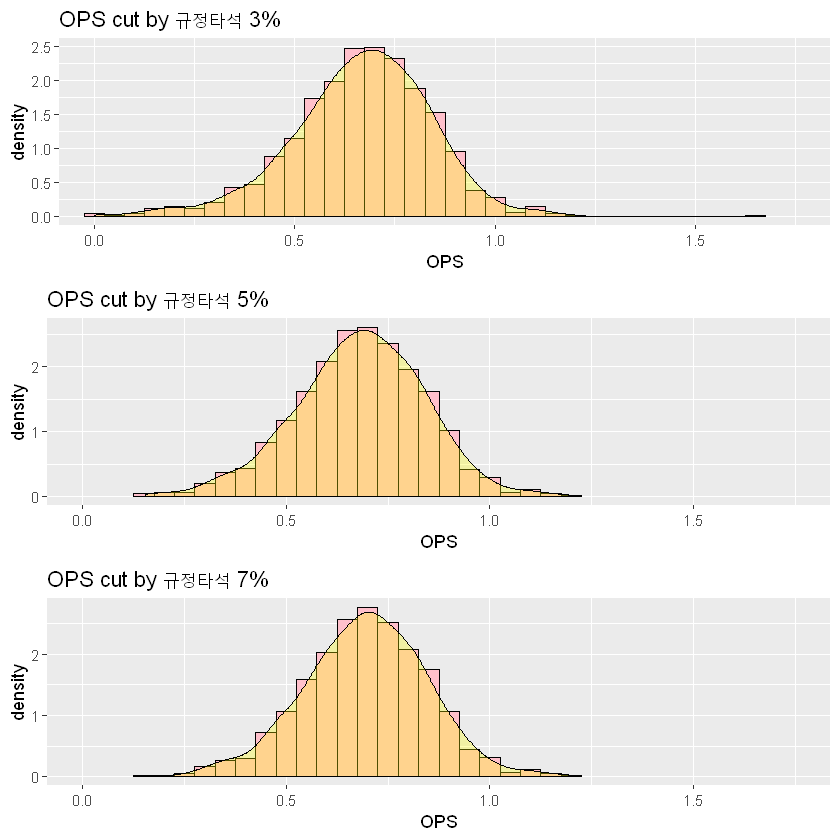

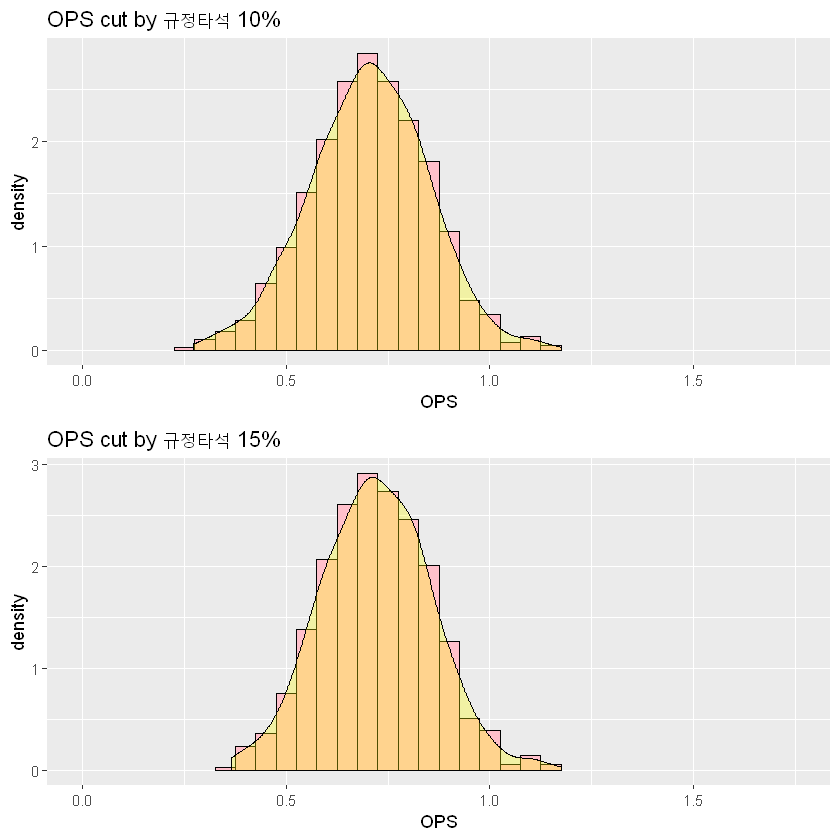

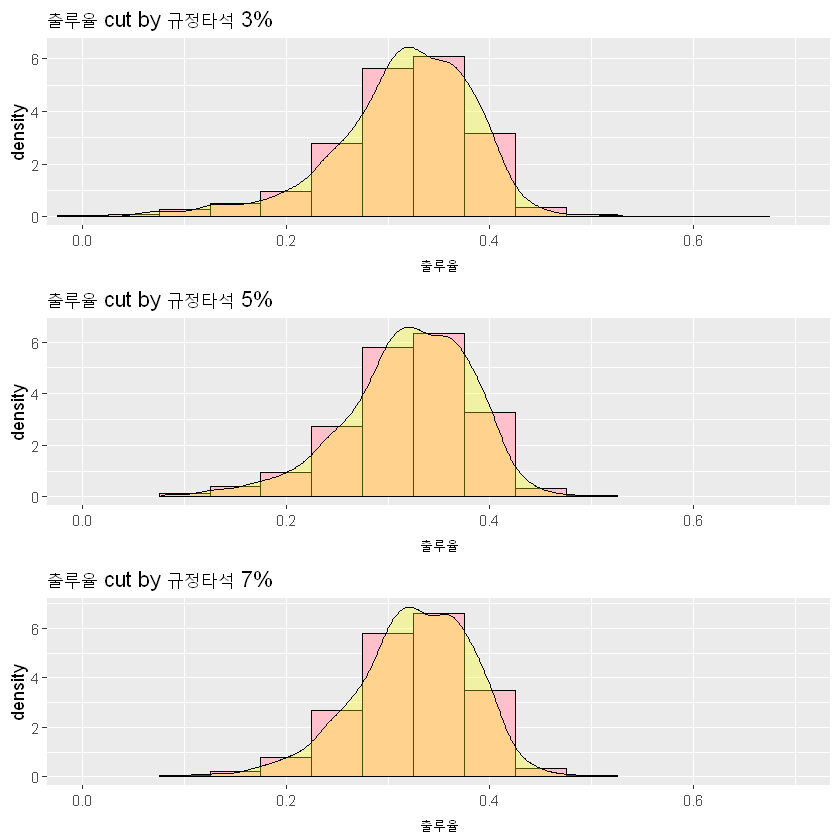

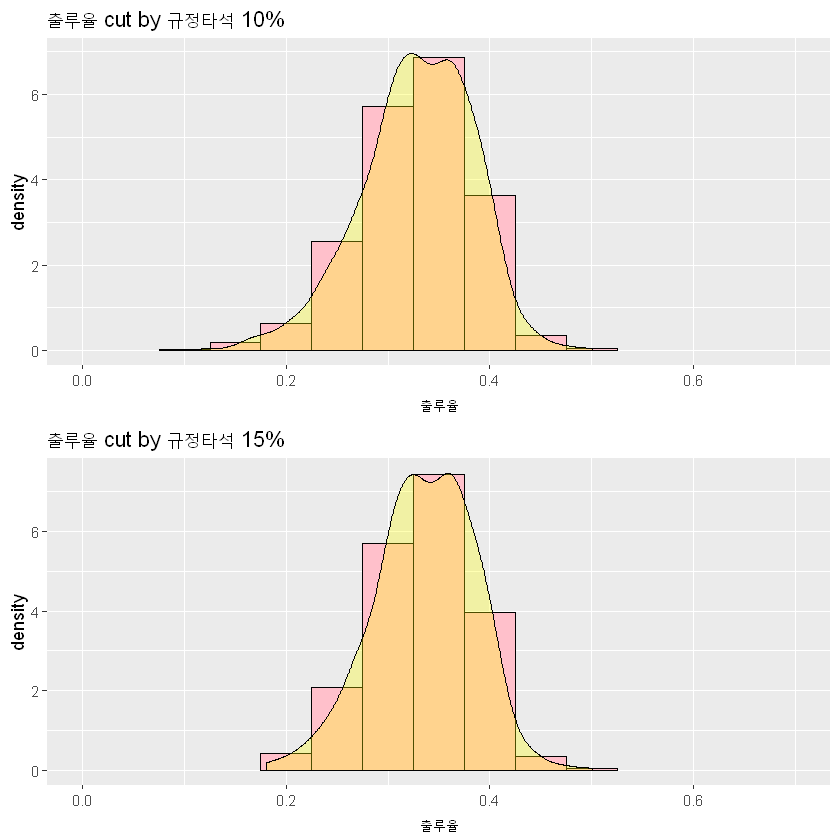

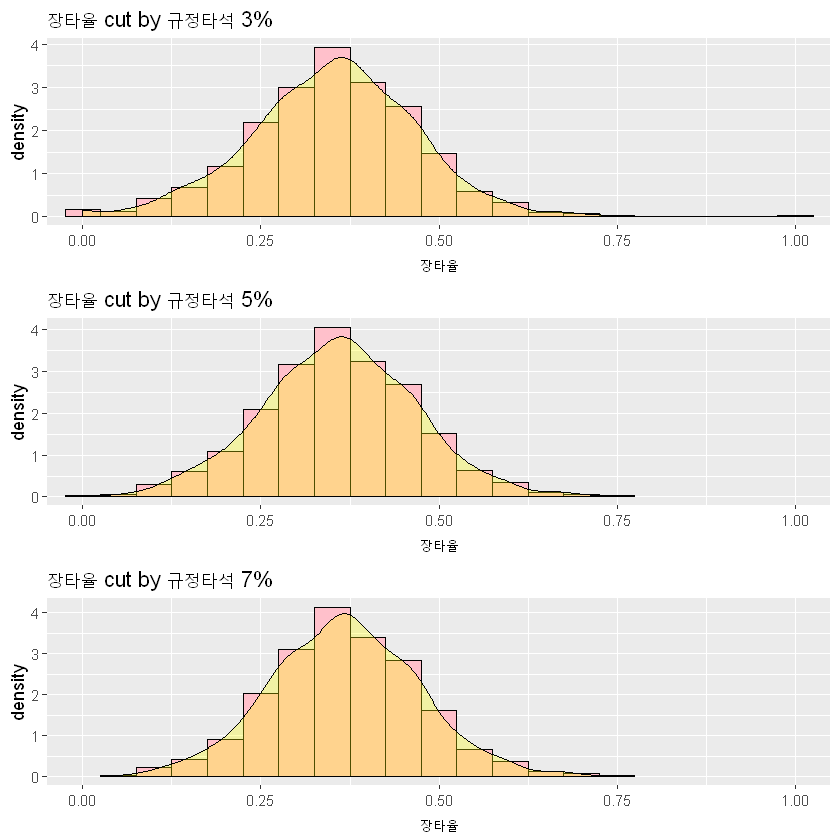

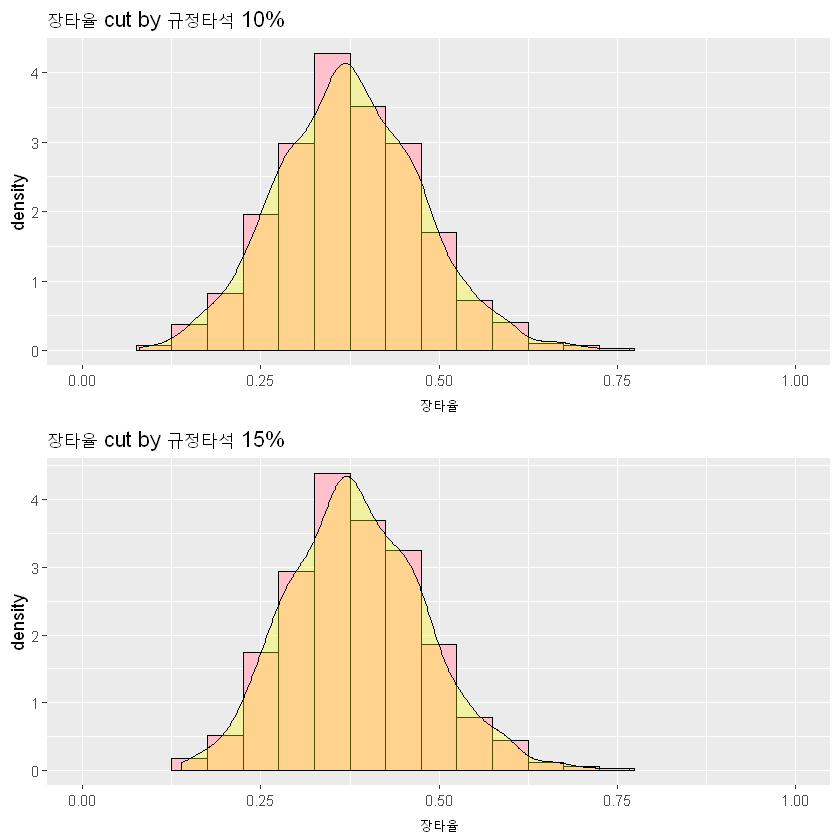

In [46]:
#OPS
grid.arrange(ops_a_3,ops_a_5,ops_a_7)
grid.arrange(ops_a_10,ops_a_15)

#출루율
grid.arrange(obp_a_3,obp_a_5,obp_a_7)
grid.arrange(obp_a_10,obp_a_15)
#장타율
grid.arrange(slg_a_3,slg_a_5,slg_a_7)
grid.arrange(slg_a_10,slg_a_15)

In [47]:
pyo2<-data.frame(percent,row_num,finalbarrels3%>%nrow())
colnames(pyo2)<-c("percent","row_num","N")
pyo3<-pyo2%>%mutate(loss_rate=round( (1-row_num/N)*100,2 ))
pyo3

percent,row_num,N,loss_rate
3,925,1063,12.98
5,866,1063,18.53
7,803,1063,24.46
10,753,1063,29.16
15,666,1063,37.35


In [48]:
#shapiro.test결과의 p-value값을 저장하는 데이터프레임 shapiro 생성
shap_ops<-c()
shap_obp<-c()
shap_slg<-c()
for (i in 1:5){
  shap_ops[i]<-shapiro.test(get(paste("a",percent[i],sep="_"))$OPS)$p.value
  shap_obp[i]<-shapiro.test(get(paste("a",percent[i],sep="_"))$출루율)$p.value
  shap_slg[i]<-shapiro.test(get(paste("a",percent[i],sep="_"))$장타율)$p.value
}
shapiro<-data.frame(shap_ops,shap_obp,shap_slg)
shapiro

#귀무가설(정규성을 따른다) 기각 여부를 나타내는 데이터프레임 shapiro2 생성
shapiro2<-as.data.frame(matrix(0,5,3))
colnames(shapiro2)<-c("ops","obp","slg")
for (j in 1:3){
  for (i in 1:5){
    ifelse(shapiro[i,j]<0.05,
           shapiro2[i,j]<-0,shapiro2[i,j]<-1)
  }
}
shapiro2

shap_ops,shap_obp,shap_slg
1.149150e-09,6.215928e-17,5.283603e-06
3.196913e-02,1.239400e-10,3.752099e-01
2.792603e-01,2.590281e-07,1.567630e-01
7.118134e-01,3.426091e-06,6.126795e-02
4.445213e-01,4.203162e-03,2.846256e-03


ops,obp,slg
0,0,0
0,0,1
1,0,1
1,0,1
1,0,0


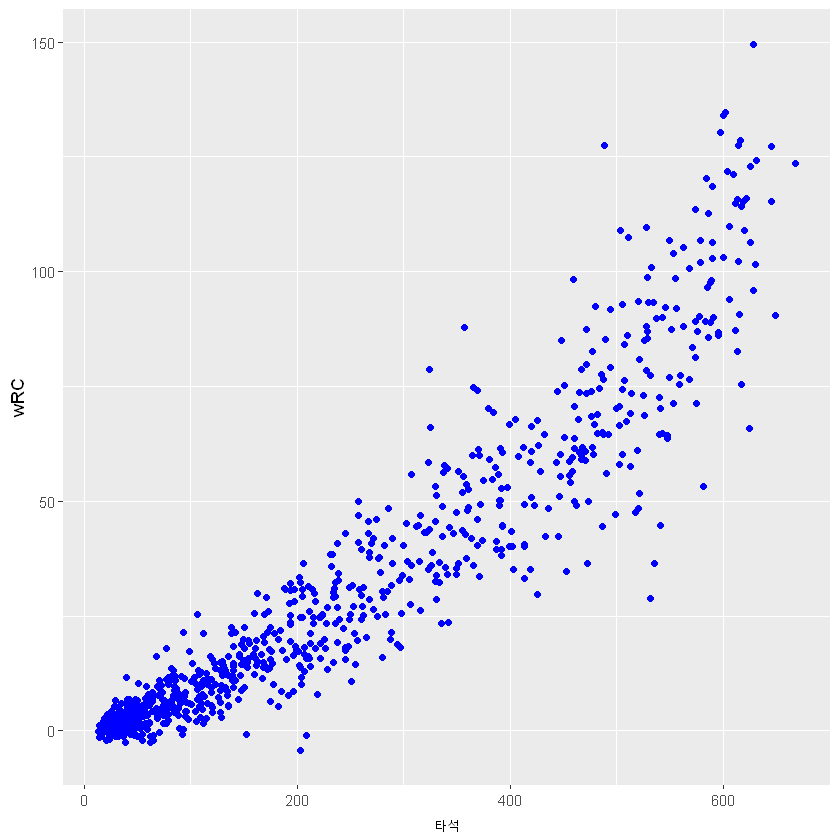

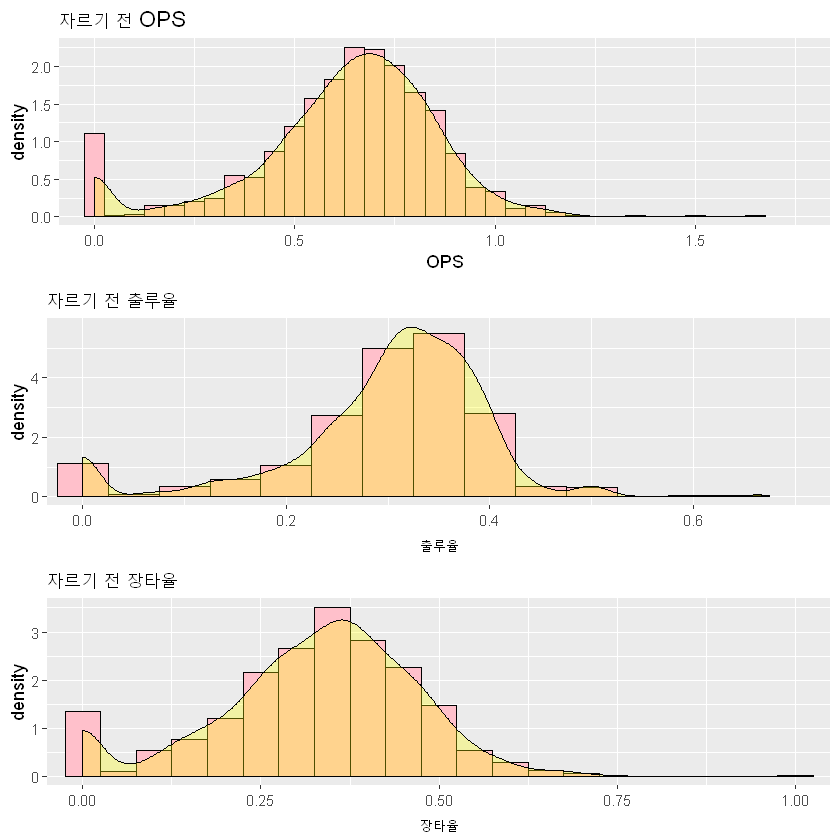

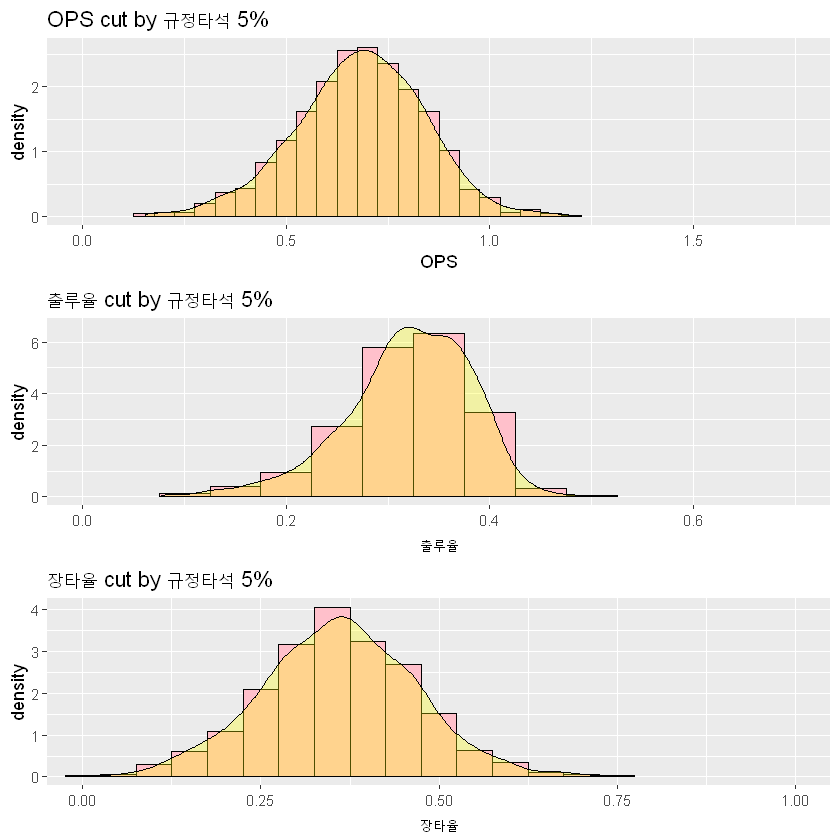

In [49]:
finalbarrels5<-finalbarrels3%>%
  filter( ifelse(GYEAR==2021,타석>=13,타석>23))

finalbarrels3%>%
  filter( ifelse(GYEAR==2021,타석>=13,타석>23))%>%
  ggplot()+
  geom_point(aes(x=타석,y=wRC),col="blue")


ops_zero<-finalbarrels3%>%
  select(c(18,19,20,8,27,25,24,39))%>%
  ggplot(aes(x=OPS,y=..density..))+
  geom_histogram(binwidth=0.05,fill = "pink", colour = "black")+
  geom_density(alpha=0.3, fill="yellow")+
  coord_cartesian(xlim=c(0,1.75)) +
  ggtitle(paste("자르기 전 OPS"))
obp_zero<-finalbarrels3%>%
  select(c(18,19,20,8,27,25,24,39))%>%
  ggplot(aes(x=출루율,y=..density..))+
  geom_histogram(binwidth=0.05,fill = "pink", colour = "black")+
  geom_density(alpha=0.3, fill="yellow")+
  coord_cartesian(xlim=c(0,0.7)) +
  ggtitle(paste("자르기 전 출루율"))
slg_zero<-finalbarrels3%>%
  select(c(18,19,20,8,27,25,24,39))%>%
  ggplot(aes(x=장타율,y=..density..))+
  geom_histogram(binwidth=0.05,fill = "pink", colour = "black")+
  geom_density(alpha=0.3, fill="yellow")+
  coord_cartesian(xlim=c(0,1)) +
  ggtitle(paste("자르기 전 장타율"))
#ppt 이상치 처리 근거
grid.arrange(ops_zero,obp_zero,slg_zero)
grid.arrange(ops_a_5,obp_a_5,slg_a_5)